# **Factors Affecting COVID-19 Vaccination Progress** 

## Data Preprocessing
#### In this section we will be assessing the datasets that we are going to use for this analysis. The main steps undertaken in this section are enumerated below.
- Importing libraries
- Reading CSV to pandas
- Previewing datasets
- Looking up information about datasets
- Checking shape of datasets
- Checking for null values
- Checking for duplicated values
- Checking for unique values

### *Importing libraries*

These are the python libraries that we will be needing for our project. The numpy and pandas libraries are primarily used for interacting with the datasetsss while the matplotlib and seaborn libraries are used for creating the necessary visualizations for analysis.

In [2]:
# import libraries that will be used in this notebook

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### *Read CSV to pandas*

Shown below are the datasets that will be used in this project. These datasets are all formatted as CSV files, and shall thus be read as such. Further details about these datasets shall follow: 

1. Political regimes 
<br>

This dataset contains a time series that charts the political regime that was present in a state in a given year. For our purpose, we are only interested in the most recent entry for each state that we will work with.
<br>
     
      Source: Our World in Data (https://ourworldindata.org/grapher/political-regimes) 

<br>

2. GDP per capita 
<br>

This dataset also contains a time series that charts the GDP per capita of a particular state in a given year. For our purpose, we are only interested in the most recent entry for each state that we will work with.
<br>

      Source: Our World in Data (https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank)

<br>

3. Human rights scores
<br>

Again, this dataset is also a time series that tracks the human rights score of a state in a given year. For our purpose, we are only interested in the most recent entry for each state that we will work with.
<br>

      Source: Our World in Data (https://ourworldindata.org/grapher/human-rights-scores?country=~CHN~HUN~PRK~KOR~NOR~ALB)

<br>

4. Population (2020)
<br>

This dataset is the most recent available global consensus of the total population within a state. Unfortunately, it is data from two years ago, but it would do considering it has nearly all the data on most states. 
<br>

      Source: Kaggle (https://www.kaggle.com/tanuprabhu/population-by-country-2020)

<br>
    
5. Fully vaccinated individuals
<br>

This dataset is of the percentate of fully vaccinated individuals in a given state in a given time. This is also a time series, but we will only extract the most recent entry available.
<br>

      Source: Our World in Data (https://ourworldindata.org/grapher/share-people-fully-vaccinated-covid)

<br>


In [3]:
# read dataset (CSV) to pandas dataframe 

# factors considered in this study 
political_regimes = pd.read_csv('data/political-regimes.csv') 
gdp = pd.read_csv('data/gdp-per-capita.csv')
human_rights_scores = pd.read_csv('data/human-rights-scores.csv')

# population statistics
population_2020 = pd.read_csv('data/population_by_country_2020.csv')

# COVID-19 vaccination by the numbers
fully_vaccinated_individuals = pd.read_csv('data/share-people-fully-vaccinated-covid.csv')

# Listing down the datasets and dataset names for looping convenience later down the line
datasets = [political_regimes,gdp,human_rights_scores,population_2020,fully_vaccinated_individuals]
datasets_name = ['political regimes','gdp','human rights scores','population 2020','fully vaccinated individuals']

### *Shape of dataset*

In [4]:
# empty lists to contain information about the shape and name of each dataset
rows = []
columns = []
upper_datasets_name = []

for i,dataset in enumerate(datasets): # looping through each dataset for convenience
    dataset_name = datasets_name[i]
    shape = dataset.shape
    
    rows.append(shape[0])
    columns.append(shape[1])
    upper_datasets_name.append(dataset_name)

# entering the data processed from the previous for loop in a pandas dataframe for better comprehension    
pd.DataFrame({'row':rows,'column':columns},index=upper_datasets_name)

,row,column
political regimes,30283,4
gdp,7109,4
human rights scores,11717,4
population 2020,235,11
fully vaccinated individuals,36190,5


### *Preview dataset*

In [5]:
# previewing first five values of the dataset
for i, dataset in enumerate(datasets): # looping through each dataset for convenience 
    dataset_name = datasets_name[i].upper()
    
    print(f'\n\n====={dataset_name}=====\n')
    display(dataset.head())



=====POLITICAL REGIMES=====



,Entity,Code,Year,Political regime
0,Afghanistan,AFG,1789,0
1,Afghanistan,AFG,1790,0
2,Afghanistan,AFG,1791,0
3,Afghanistan,AFG,1792,0
4,Afghanistan,AFG,1793,0




=====GDP=====



,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117




=====HUMAN RIGHTS SCORES=====



,Entity,Code,Year,"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)"
0,Afghanistan,AFG,1946,0.690479
1,Afghanistan,AFG,1947,0.739823
2,Afghanistan,AFG,1948,0.787035
3,Afghanistan,AFG,1949,0.816707
4,Afghanistan,AFG,1950,0.850675




=====POPULATION 2020=====



,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %




=====FULLY VACCINATED INDIVIDUALS=====



,Entity,Code,Day,people_fully_vaccinated_per_hundred,145609-annotations
0,Afghanistan,AFG,2021-05-11,0.14,NaN
1,Afghanistan,AFG,2021-05-20,0.19,NaN
2,Afghanistan,AFG,2021-05-24,0.24,NaN
3,Afghanistan,AFG,2021-05-26,0.28,NaN
4,Afghanistan,AFG,2021-05-27,0.29,NaN


With a brief glance at the previews of each dataset, we can confirm that most, excluding *population 2020*, do contain time series data. We also note that most also come with a lot of unnecessary columns that will be dropped later on. Columns that contain similar values but are labelled differently are also present here. This will be changed later to facilitate merging later on.

### *Information on dataset*

In [6]:
#shows the non-null count and data type of each variable in the datasets 
for i,dataset in enumerate(datasets): # looping through each dataset for convenience
    dataset_name = datasets_name[i].upper()
    
    print(f'\n\n ====={dataset_name}=====\n')
    dataset.info()



 =====POLITICAL REGIMES=====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30283 entries, 0 to 30282
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entity            30283 non-null  object
 1   Code              29677 non-null  object
 2   Year              30283 non-null  int64 
 3   Political regime  30283 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 946.5+ KB


 =====GDP=====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64 

Pertinent columns for each dataset is listed below along with a few remarks:
<br>
- Political regimes
    - Entity: contains categorical data 
    - Political regimes: it is in a numerical format but nevertheless contains categorical data  
- GDP
    - Entity: contains categorical data
    - GDP per capita: contains numerical data (continuous)
- Human rights scores
    - Entity: contains categorical data 
    - Human rights scores: contains numerical data (continuous)
- Population 2020
    - Country: contains categorical data
    - Population (2020): contains numerical data (discrete)
- Fully vaccinated individuals 
    - Entity: contains categorical data
    - People fully vaccinated per hundred: contains numerical data (discrete)
<br>

From each dataset, only two columns are to be retained. The country/entity is important for merging later on.


### *Checking for null values*

In [7]:
# proportion of null values in respective columns

for i,dataset in enumerate(datasets): # iterate over list of datasets

    null_count = dataset.isnull().sum() # gets total number of null values in a dataframe
    total = dataset.shape[0] # gets total number of rows in a dataframe
    percentage_null = (dataset.isnull().sum()/dataset.shape[0]*100).round(2) # gets the proportion of null values in a dataframe
    
    # this is the dictionary that will be used when creating the dataframe displaying the number of empty rows, the total number of rows, and the percentage of empty rows
    null_value_dataset = {'null count': null_count,'total':total, '%':percentage_null}
    
    # this is to turn the dataset into a pandas dataframe 
    null_value_dataset_to_dataframe = pd.DataFrame(null_value_dataset)
    
    # this is to display dataset names in UPPERCASE
    dataset_name = datasets_name[i].upper()
    
    # this is to print out corresponding dataframes for each dataset 
    print(f'\n ====={dataset_name}=====')
    display(null_value_dataset_to_dataframe)


 =====POLITICAL REGIMES=====


,null count,total,%
Entity,0,30283,0.0
Code,606,30283,2.0
Year,0,30283,0.0
Political regime,0,30283,0.0



 =====GDP=====


,null count,total,%
Entity,0,7109,0.00
Code,1380,7109,19.41
Year,0,7109,0.00
"GDP per capita, PPP (constant 2017 international $)",0,7109,0.00



 =====HUMAN RIGHTS SCORES=====


,null count,total,%
Entity,0,11717,0.0
Code,0,11717,0.0
Year,0,11717,0.0
"Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)",0,11717,0.0



 =====POPULATION 2020=====


,null count,total,%
Country (or dependency),0,235,0.00
Population (2020),0,235,0.00
Yearly Change,0,235,0.00
Net Change,0,235,0.00
Density (P/Km²),0,235,0.00
Land Area (Km²),0,235,0.00
Migrants (net),34,235,14.47
Fert. Rate,0,235,0.00
Med. Age,0,235,0.00
Urban Pop %,0,235,0.00



 =====FULLY VACCINATED INDIVIDUALS=====


,null count,total,%
Entity,0,36190,0.00
Code,5691,36190,15.73
Day,0,36190,0.00
people_fully_vaccinated_per_hundred,0,36190,0.00
145609-annotations,35068,36190,96.90


### *Checking for duplicated values*

In [8]:
for i,dataset in enumerate(datasets): # iterate over list of datasets
    dataset_name = datasets_name[i].upper() # turn dataset names to UPPERCASE
    general_duplicate_rows = dataset.duplicated().sum() # check for duplicates in a dataframe
    total_rows = len(dataset) # this is the total number of rows in the dataset
    
    # display the results of each variables for each dataset
    print(f'\n====={dataset_name}=====\nDuplicated rows: {general_duplicate_rows}\nTotal rows: {total_rows}')
    


=====POLITICAL REGIMES=====
Duplicated rows: 0
Total rows: 30283

=====GDP=====
Duplicated rows: 0
Total rows: 7109

=====HUMAN RIGHTS SCORES=====
Duplicated rows: 0
Total rows: 11717

=====POPULATION 2020=====
Duplicated rows: 0
Total rows: 235

=====FULLY VACCINATED INDIVIDUALS=====
Duplicated rows: 0
Total rows: 36190


Generally, there are no duplicate values in the dataset. Therefore, each row contains unique values.

In [9]:
#checking for rows that have duplicated country values
for i,dataset in enumerate(datasets):
    dataset_name = datasets_name[i].upper() #turns dataset names into UPPERCASE
    
    if 'Entity' in dataset.columns: # to filter population_2020 since it neither has the column 'Entity' nor does it have duplicated country values
        country_duplicate_rows = dataset.duplicated(subset=['Entity']).sum() # this time it checks for duplicated rows in the specific column: entity 
        total_rows = len(dataset) # refers to the total number of rows in the dataset
        proportion_rows = (country_duplicate_rows/total_rows)*100 # gets the proportion of duplicated rows in the dataset

        # displays the results 
        print(f'\n====={dataset_name}=====\nDuplicated country rows: {country_duplicate_rows}\nTotal rows: {total_rows}\n% duplicated rows: {proportion_rows.round(2)}')
    


=====POLITICAL REGIMES=====
Duplicated country rows: 30084
Total rows: 30283
% duplicated rows: 99.34

=====GDP=====
Duplicated country rows: 6869
Total rows: 7109
% duplicated rows: 96.62

=====HUMAN RIGHTS SCORES=====
Duplicated country rows: 11516
Total rows: 11717
% duplicated rows: 98.28

=====FULLY VACCINATED INDIVIDUALS=====
Duplicated country rows: 35954
Total rows: 36190
% duplicated rows: 99.35


However, if we consider checking the entity column for duplicates, we would then see that most values in this column are duplicates of each other. This is because these datasets contain time series data of countries over a period of time. And so, it is normal that a country's name appears repeatedly. Since we only need the latest entries for each country, we will need to drop the duplicates later on.

### *Checking unique values*

In [10]:
# unique values in each column of respective dataset 

for i,dataset in enumerate(datasets): # iterates through list of datasets to be used in this study
    variable_count = len(dataset.columns) # this gets the total number of columns in each dataset 
    dataset_name = datasets_name[i].upper() # turns dataset name into UPPERCASE 
    
    print(f'\n\n====={dataset_name}=====') #
    
    while variable_count: # iterates through columns in each dataset 
        unique_values = dataset.iloc[:,-variable_count].unique() # gets the unique values in a column; note here that a negative step is used since the variable_count starts from a higher number
        column_name = dataset.columns[-variable_count].upper() # gets the column name; note here that a negative position is used since the variable_count starts from a higher number
        
        # displays output
        print(f'\n-----{column_name}-----\n') 
        print(unique_values)
        
        # iterator
        variable_count-=1
    



=====POLITICAL REGIMES=====

-----ENTITY-----

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Baden' 'Bahrain' 'Bangladesh'
 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunswick' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'German Democratic Republic' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hanover'
 'Hesse-Darmstadt' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'It

It is useful to peruse the unique values in each column to be familiar with the values that we will be working with. In this case, however, we shall focus more on the entity/country columns so we would be able to identify which sovereign states we are to work with in the following sections.

## Data Cleaning
In this section, we will focus on preparing our datasets for analysis. The issues that we have identified earlier will now be dealt with. The following processes will then be performed:
- Renaming/dropping columns
- Dropping duplicate values
- Dropping non-sovereign states
- Merging datasets 

### *Renaming/dropping columns*
We need to rename the columns that contain the countries since they are named differently. This is so we can properly and easily merge datasets. We also need to remove the irrelevant columns from each datasets. This is so we can focus on the actual variables that we will be examining later on.

In [11]:
# political_regimes

# columns to rename
new_columns={'Entity':'country',
             'Political regime':'political_regime'}

# columns to drop 
columns_to_drop=['Code','Year']

renamed_dropped_political_regimes = (political_regimes).drop(columns=columns_to_drop).rename(columns=new_columns) # columns dropped and renamed political regime dataset 
renamed_dropped_political_regimes.head()

,country,political_regime
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0


In [12]:
# gdp

# columns to rename
new_columns={'Entity':'country',
             'GDP per capita, PPP (constant 2017 international $)':'gdp_per_capita'}

# columns to drop
columns_to_drop=['Code','Year']

renamed_dropped_gdp = (gdp).drop(columns=columns_to_drop).rename(columns=new_columns) # columns dropped and renamed gdp dataset
renamed_dropped_gdp.head()

,country,gdp_per_capita
0,Afghanistan,1189.784668
1,Afghanistan,1235.810063
2,Afghanistan,1200.278013
3,Afghanistan,1286.793659
4,Afghanistan,1315.789117


In [13]:
# human_rights_scores

# columns to rename
new_columns={'Entity':'country',
             'Human Rights Score (Schnakenberg & Fariss, 2014; Fariss, 2019)':'human_rights_score'}

# columns to drop
columns_to_drop=['Year','Code']

renamed_dropped_human_rights_score = (human_rights_scores).drop(columns=columns_to_drop).rename(columns=new_columns) # columns dropped and renamed human rights scores dataset 
renamed_dropped_human_rights_score.head()

,country,human_rights_score
0,Afghanistan,0.690479
1,Afghanistan,0.739823
2,Afghanistan,0.787035
3,Afghanistan,0.816707
4,Afghanistan,0.850675


In [14]:
# population_2020

# columns to rename
columns_to_drop = ['Yearly Change','Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']

# columns to drop
new_columns = {'Country (or dependency)':'country',
               'Population (2020)':'population'}

renamed_dropped_population_2020 = (population_2020).drop(columns=columns_to_drop).rename(columns=new_columns).sort_values(by='country').reset_index().drop(columns='index') # columns dropped and renamed population 2020 dataset 
renamed_dropped_population_2020.head()

,country,population
0,Afghanistan,39074280
1,Albania,2877239
2,Algeria,43984569
3,American Samoa,55169
4,Andorra,77287


In [15]:
# fully_vaccinated_individuals

# columns to rename 
new_columns={'Entity':'country','people_fully_vaccinated_per_hundred':'fully_vaccinated_percent'}

# columns to drop 
columns_to_drop=['Code','145609-annotations','Day']

renamed_dropped_fully_vaccinated_individuals = (fully_vaccinated_individuals).drop(columns=columns_to_drop).rename(columns=new_columns) # columns dropped and renamed fully vaccinated individuals dataset
renamed_dropped_fully_vaccinated_individuals.head()

,country,fully_vaccinated_percent
0,Afghanistan,0.14
1,Afghanistan,0.19
2,Afghanistan,0.24
3,Afghanistan,0.28
4,Afghanistan,0.29


Now that we have removed and renamed the columns we now have a more organized and uniformed layout for each dataset. But we still have to make sure that remove the duplicate rows and get the latest entry.

### *Dropping duplicate values*
Since we did not, in any way, alter the original arrangement of the data in each dataset, we can readily and confidently drop the duplicate values in the country column and get the latest entry for each country. We would exclude the population 2020 dataset since it does not contain duplicate values.

In [16]:
# political regimes 

sans_duplicates_political_regimes = renamed_dropped_political_regimes.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index') # dropping the duplicate values in the country column while keeping only the last entry; we are also resetting the index and dropping the old index column 

display(sans_duplicates_political_regimes.head())
print(f'Number of rows: {len(sans_duplicates_political_regimes)}')

,country,political_regime
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Angola,1
4,Argentina,2


Number of rows: 199


In [17]:
# gdp

sans_duplicates_gdp = renamed_dropped_gdp.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index') # dropping the duplicate values in the country column while keeping only the last entry; we are also resetting the index and dropping the old index column 

display(sans_duplicates_gdp.head())
print(f'Number of rows: {len(sans_duplicates_gdp)}')

,country,gdp_per_capita
0,Afghanistan,1978.961579
1,Africa Eastern and Southern,3387.594670
2,Africa Western and Central,4003.158913
3,Albania,13295.410885
4,Algeria,10681.679297


Number of rows: 240


In [18]:
# human rights score

sans_duplicates_human_rights_score = renamed_dropped_human_rights_score.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index') # dropping the duplicate values in the country column while keeping only the last entry; we are also resetting the index and dropping the old index column 

display(sans_duplicates_human_rights_score.head())
print(f'Number of rows: {len(sans_duplicates_human_rights_score)}')

,country,human_rights_score
0,Afghanistan,-2.311017
1,Albania,0.851180
2,Algeria,0.354197
3,Andorra,4.221865
4,Angola,-0.388863


Number of rows: 201


In [19]:
# fully vaccinated individuals

sans_duplicates_fully_vaccinated_individuals = renamed_dropped_fully_vaccinated_individuals.drop_duplicates(subset='country',keep='last').reset_index().drop(columns='index') # dropping the duplicate values in the country column while keeping only the last entry; we are also resetting the index and dropping the old index column 

display(sans_duplicates_fully_vaccinated_individuals.head())
print(f'Number of rows: {len(sans_duplicates_fully_vaccinated_individuals)}')

,country,fully_vaccinated_percent
0,Afghanistan,9.42
1,Africa,9.29
2,Albania,35.89
3,Algeria,12.57
4,Andorra,65.35


Number of rows: 236


### *Dropping non-sovereign states*
Upon examining the unique values for the entity/country column in each dataset, we noticed that not all of them were sovereign states. In this study, we limited the scope of our investigation to those states that have sovereignty. That is why we have to filter through the values in the newly minted country column, trying to weed out non-sovereign states.

In [20]:
# list of sovereign states that we will consider for each country column
sovereign_states = ['Afghanistan','Albania','Algeria','Angola','Antigua and Barbuda','Argentina','Armenia','Aruba',
                    'Australia','Austria','Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium',
                    'Belize','Benin','Bermuda','Bhutan','Bolivia','Bosnia and Herzegovina','Botswana','Brazil','Brunei',
                    'Bulgaria','Burkina Faso','Burundi' 'Cambodia','Cameroon','Canada','Cape Verde','Central African Republic',
                    'Chad','Chile','China','Colombia','Comoros','Congo','Costa Rica',"Cote d'Ivoire",'Croatia','Cyprus','Czechia',
                    'Democratic Republic of Congo','Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador',
                    'Equatorial Guinea','Estonia','Eswatini','Ethiopia','Fiji''Finland','France','Gabon','Gambia','Georgia','Germany','Ghana',
                    'Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia',
                    'Iran','Iraq','Ireland','Israel','Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Kuwait','Kyrgyzstan','Laos',
                    'Lebanon','Lesotho','Liberia','Libya','Lithuania','Luxembourg','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta','Marshall Islands',
                    'Mauritania','Mauritius','Mexico','Micronesia','Moldova','Mongolia','Montenegro','Morocco','Mozambique','Myanmar','Namibia','Nauru',
                    'Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','North Macedonia','Norway','Oman','Pakistan','Palau','Palestine','Panama',
                    'Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Puerto Rico','Qatar','Romania','Russia','Rwanda','Saint Kitts and Nevis',
                    'Saint Lucia','Saint Vincent and the Grenadines','Samoa','San Marino','Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
                    'Sierra Leone','Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Korea','Spain','Sri Lanka','Sudan','Suriname',
                    'Sweden','Switzerland','Tajikistan','Tanzania','Thailand','Timor','Togo','Tonga','Trinidad and Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu',
                    'Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Vietnam','Zambia','Zimbabwe'
                    ] 
print(len(sovereign_states))

184


In [21]:
# political regimes

cleaned_political_regimes = sans_duplicates_political_regimes[sans_duplicates_political_regimes['country'].isin(sovereign_states)] # using the isin() function to filter out non-sovereign states in the country column
cleaned_political_regimes

,country,political_regime
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Angola,1
4,Argentina,2
...,...,...
190,Uzbekistan,1
191,Vanuatu,2
193,Vietnam,0
196,Zambia,1


In [22]:
# gdp

cleaned_gdp = sans_duplicates_gdp[sans_duplicates_gdp['country'].isin(sovereign_states)] # using the isin() function to filter out non-sovereign states in the country column
cleaned_gdp

,country,gdp_per_capita
0,Afghanistan,1978.961579
3,Albania,13295.410885
4,Algeria,10681.679297
5,Angola,6198.083841
6,Antigua and Barbuda,17956.315716
...,...,...
234,Uzbekistan,6994.169412
235,Vanuatu,2762.791388
236,Vietnam,8200.331867
238,Zambia,3270.035112


In [23]:
# human rights score

cleaned_human_rights_score = sans_duplicates_human_rights_score[sans_duplicates_human_rights_score['country'].isin(sovereign_states)] # using the isin() function to filter out non-sovereign states in the country column
cleaned_human_rights_score

,country,human_rights_score
0,Afghanistan,-2.311017
1,Albania,0.851180
2,Algeria,0.354197
4,Angola,-0.388863
5,Antigua and Barbuda,1.335031
...,...,...
189,Uzbekistan,-0.588449
190,Vanuatu,2.312696
192,Vietnam,-0.373984
198,Zambia,-0.043186


In [24]:
# population 2020

cleaned_population_2020 = renamed_dropped_population_2020[renamed_dropped_population_2020['country'].isin(sovereign_states)] # using the isin() function to filter out non-sovereign states in the country column
cleaned_population_2020

,country,population
0,Afghanistan,39074280
1,Albania,2877239
2,Algeria,43984569
5,Angola,33032075
7,Antigua and Barbuda,98069
...,...,...
226,Uzbekistan,33551824
227,Vanuatu,308337
229,Vietnam,97490013
233,Zambia,18468257


In [25]:
# fully vaccinated individuals

cleaned_fully_vaccinated_individuals = sans_duplicates_fully_vaccinated_individuals[sans_duplicates_fully_vaccinated_individuals['country'].isin(sovereign_states)] # using the isin() function to filter out non-sovereign states in the country column
cleaned_fully_vaccinated_individuals

,country,fully_vaccinated_percent
0,Afghanistan,9.42
2,Albania,35.89
3,Algeria,12.57
5,Angola,11.58
7,Antigua and Barbuda,59.62
...,...,...
225,Uzbekistan,32.72
226,Vanuatu,16.03
228,Vietnam,57.44
234,Zambia,6.43


This is the final step of cleaning process. We shall now proceed with merging the five datasets that we have carefully cleaned and prepared. 

### *Merging datasets*
We will be merging our cleaned datasets in this section. We will use the inner type merge, which is similar to the inner join merge function in SQL. The reason why we chose to use inner merge is because we want to preserve the order of the left keys while also ensuring that only the rows that have corresponding matches are included. And owing to making the country column uniformed, we are able to merge these datasets on the country column with complete confidence that it would not do so correctly and completely.

In [26]:
political_regime_N_gdp = cleaned_political_regimes.merge(cleaned_gdp,how='inner',on='country') # merging political regime dataset and gdp dataset
political_regime_N_gdp_N_human_rights_score = political_regime_N_gdp.merge(cleaned_human_rights_score,how='inner',on='country') # merging political regime-gdp dataset and human rights score dataset 
political_regime_N_gdp_N_human_rights_score_N_population = political_regime_N_gdp_N_human_rights_score.merge(cleaned_population_2020,how='inner',on='country') # merging political regime-gdp-human rights score dataset and population dataset

prime_dataset = political_regime_N_gdp_N_human_rights_score_N_population.merge(cleaned_fully_vaccinated_individuals,how='inner',on='country') # merging all five datasets 
prime_dataset = prime_dataset[['country','political_regime','human_rights_score','gdp_per_capita','population','fully_vaccinated_percent']] # rearranging the columns of the prime dataset by data type (categorical then numerical) and by variable type (independent then dependent)

display(prime_dataset)
prime_dataset.info()

,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42
1,Albania,2,0.851180,13295.410885,2877239,35.89
2,Algeria,1,0.354197,10681.679297,43984569,12.57
3,Angola,1,-0.388863,6198.083841,33032075,11.58
4,Argentina,2,0.784109,19686.523659,45267449,71.66
...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72
149,Vanuatu,2,2.312696,2762.791388,308337,16.03
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44
151,Zambia,1,-0.043186,3270.035112,18468257,6.43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   153 non-null    object 
 1   political_regime          153 non-null    int64  
 2   human_rights_score        153 non-null    float64
 3   gdp_per_capita            153 non-null    float64
 4   population                153 non-null    int64  
 5   fully_vaccinated_percent  153 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 8.4+ KB


The prime_dataset is the pre-final version of our dataset that we will operationalize in the analysis portion of this notebook. This is, unfortunately, not yet to final version of our dataset since we have yet to integrate additional features into this dataset. 

## Feature Engineering
In this section of the notebook, we will be adding additional features to the prime_dataset to fully maximize the capabilities of this dataset. The following processes will be performed in this setion:
- Categorizing political regimes
- Assigning regions
- Finalizing features
- Identifying the absolute number of fully vaccinated individuals
- Dataset to CSV

### *Categorizing political regimes*
To improve reader comprehension of this dataset we are going to convert the political regime values from numerical values to it's equivalent categorical values.  

In [27]:
# converting the numerical values to string first so that we can use the replace function to change the value to another string
prime_dataset.loc[:,'regime_type'] = prime_dataset.loc[:,'political_regime'].astype(str).replace({'0':'Closed Autocracy','1':'Electoral Autocracy','2':'Electoral Democracy','3':'Liberal Democracy'}) 
prime_dataset

,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent,regime_type
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42,Electoral Autocracy
1,Albania,2,0.851180,13295.410885,2877239,35.89,Electoral Democracy
2,Algeria,1,0.354197,10681.679297,43984569,12.57,Electoral Autocracy
3,Angola,1,-0.388863,6198.083841,33032075,11.58,Electoral Autocracy
4,Argentina,2,0.784109,19686.523659,45267449,71.66,Electoral Democracy
...,...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72,Electoral Autocracy
149,Vanuatu,2,2.312696,2762.791388,308337,16.03,Electoral Democracy
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44,Closed Autocracy
151,Zambia,1,-0.043186,3270.035112,18468257,6.43,Electoral Autocracy


### *Assigning Regions*
We will be adding a category that would be used to group countries into their respective regions. This can help in analyzing swaths of data easier by minimizing the number of entities to compare and observe.

In [28]:
def country_region_classifier(country):
    ''' This is a function tjat can be used to classify a country into its equivalent geopolitical region
    
    Arguments:
    country {string} -- country name input 
    
    '''
    africa = ['Angola','Burkina Faso','Benin','Botswana',
              'Congo','Cameroon','Central African Republic',
              'Ethiopia','Gabon','Ghana','Gambia','Guinea',
              'Equatorial Guinea','Guinea-Bissau','Kenya',
              'Liberia','Lesotho','Madagascar','Mali','Mauritius',
              'Malawi','Mozambique','Namibia','Niger','Nigeria',
              'Rwanda','Seychelles','Sierra Leone','Senegal',
              'Eswatini','Chad','Togo','Tanzania','Uganda',
              'South Africa','Zambia', 'Zimbabwe']
    
    arab_states = ['Bahrain','Djibouti','Algeria','Comoros',
                   'Morocco','Mauritania','Sudan','Somalia','Tunisia',]

    asia = ['Afghanistan','Azerbaijan','Bangladesh','Bhutan','China',
            'Indonesia','India','Japan','Kyrgyzstan','South Korea',
            'Kazakhstan','Laos','Sri Lanka','Myanmar','Mongolia',
            'Maldives','Malaysia','Nepal','Papua New Guinea',
            'Philippines','Pakistan','Singapore','Thailand',
            'Tajikistan','Turkmenistan','Uzbekistan','Vietnam']

    pacific = ['New Zealand','Solomon Islands','Australia','Vanuatu']
    
    europe = ['Albania','Armenia','Austria','Bosnia and Herzegovina',
              'Belgium','Bulgaria','Belarus','Switzerland','Cyprus',
              'Germany','Denmark','Estonia','Spain','France','United Kingdom',
              'Georgia','Greece','Croatia','Hungary','Ireland','Israel','Italy',
              'Lithuania','Luxembourg','Moldova','Malta','North Macedonia',
              'Montenegro','Netherlands','Norway','Poland','Portugal','Romania',
              'Slovakia','Slovenia','Sweden','Turkey','Russia','Iceland','Ukraine']

    middle_east = ['United Arab Emirates','Egypt','Iran','Iraq','Jordan',
               'Kuwait','Lebanon','Libya','Oman','Qatar','Saudi Arabia']

    north_america = [ 'United States','Canada']

    south_america = ['Argentina','Barbados','Bolivia','Brazil','Chile', 
                 'Colombia','Costa Rica','Dominican Republic','Ecuador',
                 'El Salvador','Guatemala','Guyana','Haiti','Honduras',
                 'Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru',
                 'Suriname','Trinidad and Tobago','Uruguay',] 
    
    # nested if that is used to identify which region a country belongs to; if the country name that was entered matches any of those identified within the respective list of regions then it will return the region name
    if country in africa:
        return 'Africa'
    elif country in arab_states:
        return 'Arab States'
    elif country in asia:
        return 'Asia'
    elif country in pacific:
        return 'Pacific'
    elif country in europe:
        return 'Europe'
    elif country in middle_east:
        return 'Middle East'
    elif country in north_america:
        return 'North America'
    else:
        return 'South America'
    

prime_dataset.loc[:,'region'] = prime_dataset.loc[:,'country'].apply(country_region_classifier) # using the apply() function to apply the countr_region_classifier function to an entire column in a pandas dataframe
prime_dataset

,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent,regime_type,region
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42,Electoral Autocracy,Asia
1,Albania,2,0.851180,13295.410885,2877239,35.89,Electoral Democracy,Europe
2,Algeria,1,0.354197,10681.679297,43984569,12.57,Electoral Autocracy,Arab States
3,Angola,1,-0.388863,6198.083841,33032075,11.58,Electoral Autocracy,Africa
4,Argentina,2,0.784109,19686.523659,45267449,71.66,Electoral Democracy,South America
...,...,...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72,Electoral Autocracy,Asia
149,Vanuatu,2,2.312696,2762.791388,308337,16.03,Electoral Democracy,Pacific
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44,Closed Autocracy,Asia
151,Zambia,1,-0.043186,3270.035112,18468257,6.43,Electoral Autocracy,Africa


### *Identifying the absolute number of fully vaccinated individuals*
Converting the actual number of fully vaccinated individuals from the population is a necessary step because it can be used later on for data visualization that requires getting the total number of fully vaccinated individuals as compared to relying only on percentage values (i.e. fully_vaccinated_percent).

In [29]:
prime_dataset['fully_vaccinated_absolute'] = round(prime_dataset.loc[:,'population']*(prime_dataset.loc[:,'fully_vaccinated_percent']/100)) # getting the absolute number of fully vaccinated individuals require multiplying the proportion of fully vaxxed individuals to the population and rounding up the product
prime_dataset['fully_vaccinated_absolute'] = prime_dataset['fully_vaccinated_absolute'].astype(int) # converting it to an integer to get rid of the decimal points to make it have the same format as the values in the population column

prime_dataset

,country,political_regime,human_rights_score,gdp_per_capita,population,fully_vaccinated_percent,regime_type,region,fully_vaccinated_absolute
0,Afghanistan,1,-2.311017,1978.961579,39074280,9.42,Electoral Autocracy,Asia,3680797
1,Albania,2,0.851180,13295.410885,2877239,35.89,Electoral Democracy,Europe,1032641
2,Algeria,1,0.354197,10681.679297,43984569,12.57,Electoral Autocracy,Arab States,5528860
3,Angola,1,-0.388863,6198.083841,33032075,11.58,Electoral Autocracy,Africa,3825114
4,Argentina,2,0.784109,19686.523659,45267449,71.66,Electoral Democracy,South America,32438654
...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,1,-0.588449,6994.169412,33551824,32.72,Electoral Autocracy,Asia,10978157
149,Vanuatu,2,2.312696,2762.791388,308337,16.03,Electoral Democracy,Pacific,49426
150,Vietnam,0,-0.373984,8200.331867,97490013,57.44,Closed Autocracy,Asia,55998263
151,Zambia,1,-0.043186,3270.035112,18468257,6.43,Electoral Autocracy,Africa,1187509


### *Finalizing features*
The prime_dataset is now complete and ready to be operationalized. All that remains now is to rearrange the columns.

In [30]:
# rearranging the columns by data type (categorical first then numerical) and by variable type (independent first then dependent)
# we also exclude the political regime column in favor of its categorical counterpart
prime_dataset = prime_dataset[['country','region','regime_type','human_rights_score','gdp_per_capita','population','fully_vaccinated_absolute','fully_vaccinated_percent']] 
prime_dataset

,country,region,regime_type,human_rights_score,gdp_per_capita,population,fully_vaccinated_absolute,fully_vaccinated_percent
0,Afghanistan,Asia,Electoral Autocracy,-2.311017,1978.961579,39074280,3680797,9.42
1,Albania,Europe,Electoral Democracy,0.851180,13295.410885,2877239,1032641,35.89
2,Algeria,Arab States,Electoral Autocracy,0.354197,10681.679297,43984569,5528860,12.57
3,Angola,Africa,Electoral Autocracy,-0.388863,6198.083841,33032075,3825114,11.58
4,Argentina,South America,Electoral Democracy,0.784109,19686.523659,45267449,32438654,71.66
...,...,...,...,...,...,...,...,...
148,Uzbekistan,Asia,Electoral Autocracy,-0.588449,6994.169412,33551824,10978157,32.72
149,Vanuatu,Pacific,Electoral Democracy,2.312696,2762.791388,308337,49426,16.03
150,Vietnam,Asia,Closed Autocracy,-0.373984,8200.331867,97490013,55998263,57.44
151,Zambia,Africa,Electoral Autocracy,-0.043186,3270.035112,18468257,1187509,6.43


### *Dataset to CSV*
We will be saving the final version of the dataset into a CSV file for later use or for deployment in other future projects.

In [31]:
prime_dataset.to_csv('prime-dataset.csv')

## Data Visualization and Analysis 

### *Descriptive Statistics*

In [32]:
prime_dataset.describe()

,human_rights_score,gdp_per_capita,population,fully_vaccinated_absolute,fully_vaccinated_percent
count,153.000000,153.000000,1.530000e+02,1.530000e+02,153.000000
mean,0.492086,20035.342022,4.874557e+07,2.476458e+07,42.308889
std,1.511412,20594.633036,1.655670e+08,1.106548e+08,27.162765
min,-2.470596,829.611429,9.845300e+04,2.272100e+04,0.480000
25%,-0.467374,4706.570238,4.032294e+06,8.175160e+05,16.030000
50%,0.409907,12536.941756,1.019141e+07,3.108092e+06,43.050000
75%,1.368498,28384.987785,3.698562e+07,1.097816e+07,67.590000
max,5.129846,110261.157353,1.440298e+09,1.204089e+09,91.270000


### *Globalizing Settings for Viz*

In [169]:
sns.set_theme(font_scale=2,context='notebook',style='whitegrid',palette='deep')

### *Data distribution*

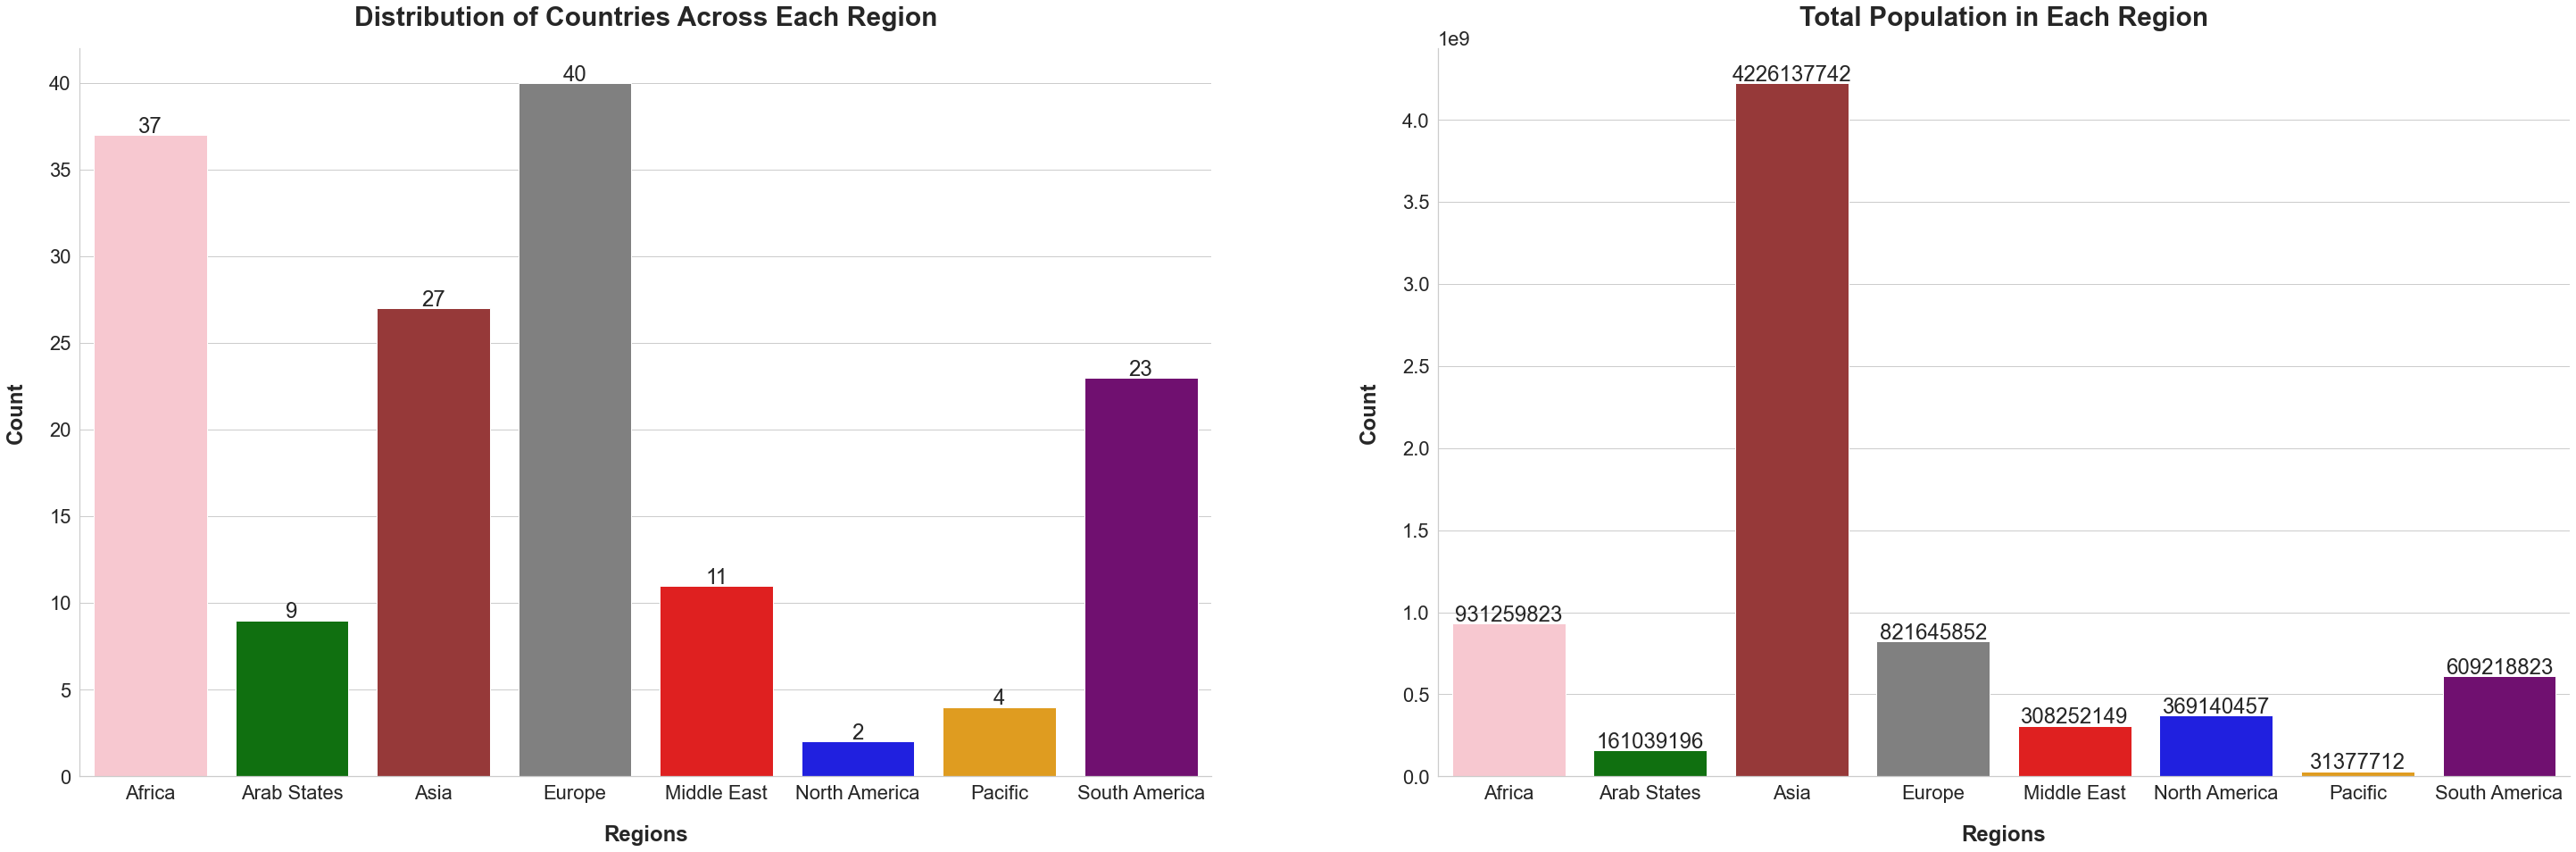

In [200]:

region_distribution = prime_dataset['region'].value_counts().sort_index()
population_region_distribution = prime_dataset.groupby(by='region')['population'].sum().sort_index()

fig = plt.figure(figsize=(50,15))
ax_country_region = fig.add_subplot(121)

region_dist = sns.barplot(x=region_distribution.index,y=region_distribution.values,palette={'North America':'blue','Pacific':'orange','Arab States':'green','Middle East':'red','South America':'purple','Asia':'brown','Africa':'pink','Europe':'grey'})

for bar in region_dist.patches:
    region_dist.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center',xytext = (0, 9),textcoords = 'offset points')
    
ax_country_region.set_title('Distribution of Countries Across Each Region',size=30,pad=25,fontdict={'fontweight':'bold'})
ax_country_region.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_country_region.set_xlabel('Regions',labelpad=25,fontweight='bold')

for location in ['top', 'right']:
        ax_country_region.spines[location].set_visible(False)

ax_population_region = fig.add_subplot(122)

population_region_dist = sns.barplot(x=population_region_distribution.index,y=population_region_distribution.values,palette={'North America':'blue','Pacific':'orange','Arab States':'green','Middle East':'red','South America':'purple','Asia':'brown','Africa':'pink','Europe':'grey'})

for bar in population_region_dist.patches:
    population_region_dist.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center',xytext = (0, 9),textcoords = 'offset points')
    
ax_population_region.set_title('Total Population in Each Region',size=30,pad=25,fontdict={'fontweight':'bold'})
ax_population_region.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_population_region.set_xlabel('Regions',labelpad=25,fontweight='bold')

for location in ['top', 'right']:
        ax_population_region.spines[location].set_visible(False)
        
plt.savefig('viz/region-distribution-totalpop.png',facecolor='white', transparent=False)

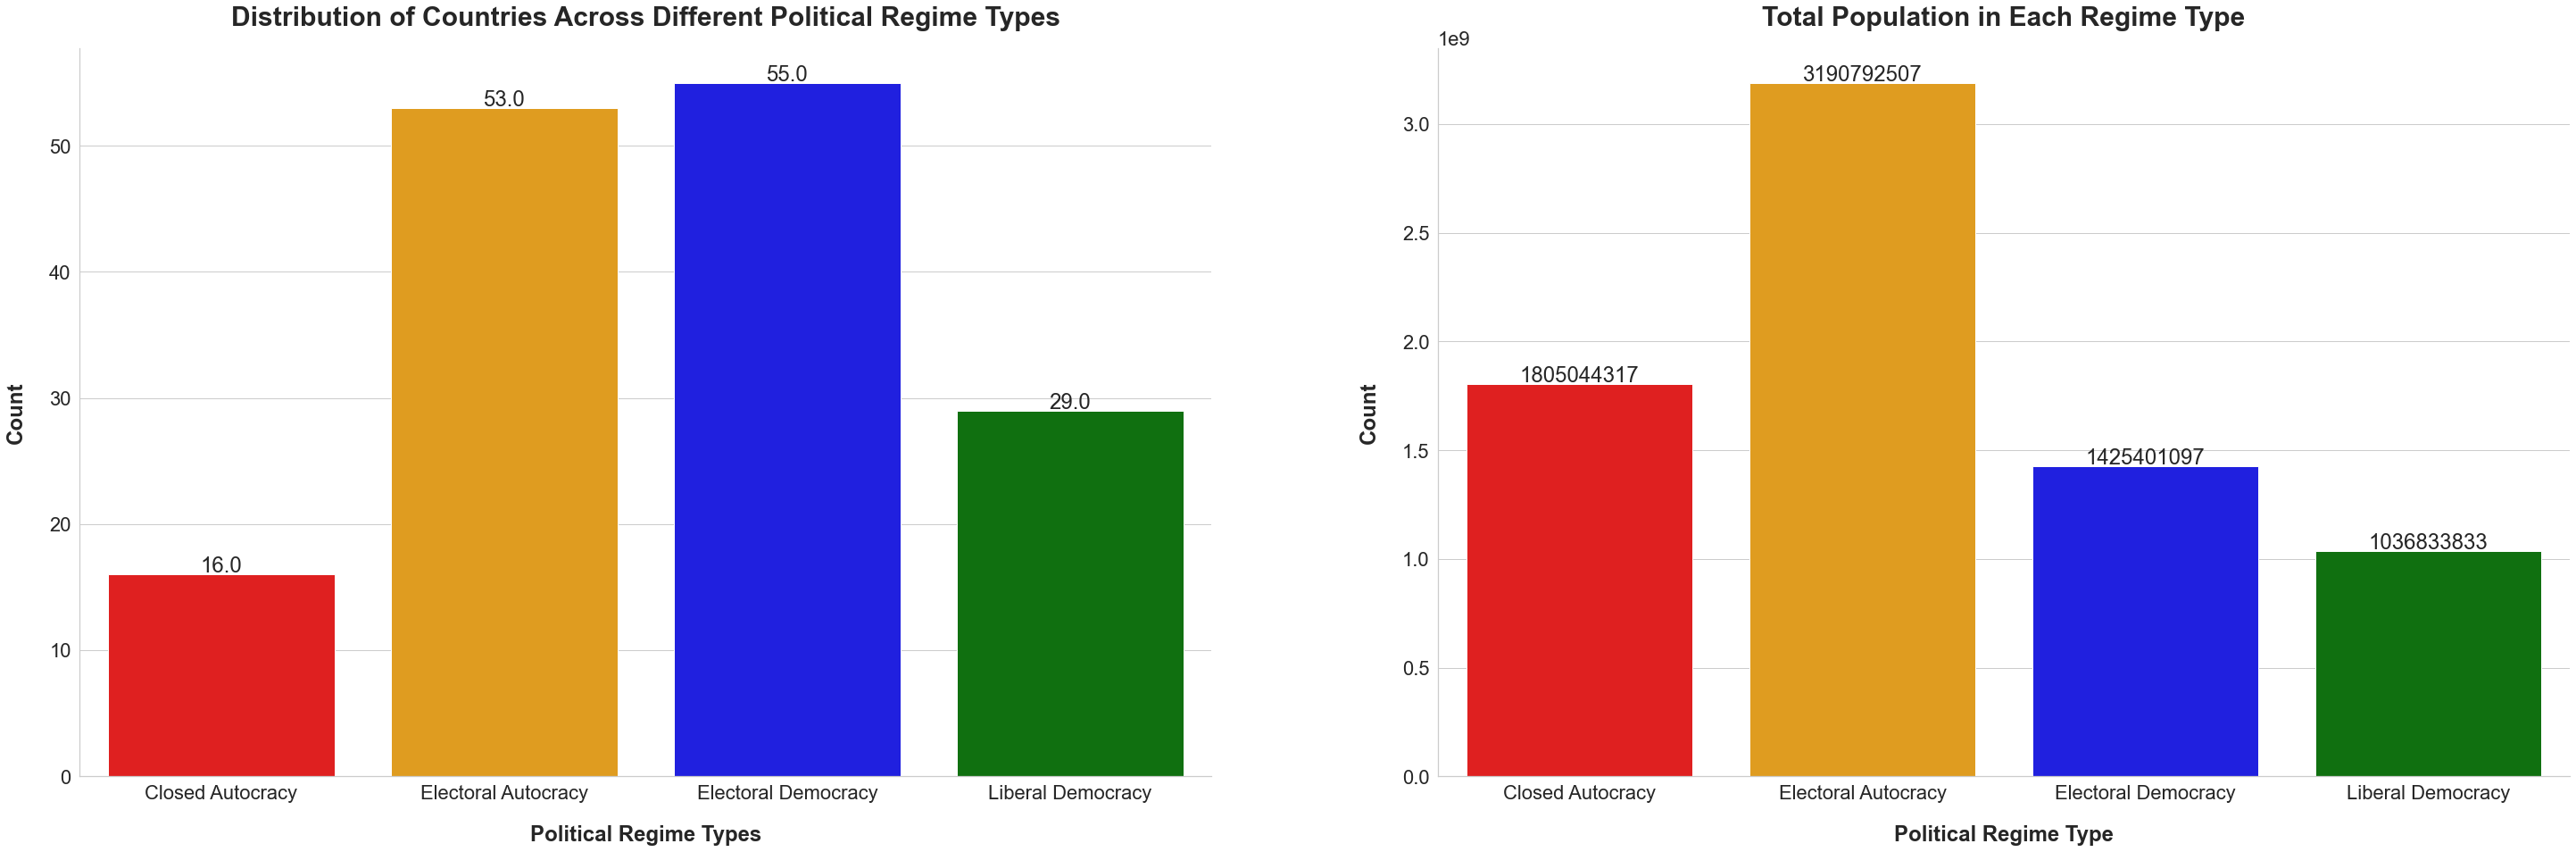

In [199]:

regime_distribution = prime_dataset['regime_type'].value_counts().sort_index()
population_regime_distribution = prime_dataset.groupby(by='regime_type')['population'].sum().sort_index()

fig = plt.figure(figsize=(50,15))
ax_country_regime = fig.add_subplot(121)

regime_dist = sns.barplot(x=regime_distribution.index,y=regime_distribution.values,palette={'Closed Autocracy':'red','Liberal Democracy':'green','Electoral Democracy':'blue','Electoral Autocracy':'orange'})

for bar in regime_dist.patches:
    regime_dist.annotate(format(bar.get_height(), '.1f'),(bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center',xytext = (0, 9),textcoords = 'offset points')
    
ax_country_regime.set_title('Distribution of Countries Across Different Political Regime Types',size=30,pad=25,fontdict={'fontweight':'bold'})
ax_country_regime.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_country_regime.set_xlabel('Political Regime Types',labelpad=25,fontweight='bold')

for location in ['top', 'right']:
        ax_country_regime.spines[location].set_visible(False)
        
ax_population_regime = fig.add_subplot(122)

population_regime_dist = sns.barplot(x=population_regime_distribution.index,y=population_regime_distribution.values,palette={'Closed Autocracy':'red','Liberal Democracy':'green','Electoral Democracy':'blue','Electoral Autocracy':'orange'})

for bar in population_regime_dist.patches:
    population_regime_dist.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center',xytext = (0, 9),textcoords = 'offset points')
    
ax_population_regime.set_title('Total Population in Each Regime Type',size=30,pad=25,fontdict={'fontweight':'bold'})
ax_population_regime.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_population_regime.set_xlabel('Political Regime Type',labelpad=25,fontweight='bold')

for location in ['top', 'right']:
        ax_population_regime.spines[location].set_visible(False)
        
plt.savefig('viz/regime-type-distribution-totalpop.png',facecolor='white', transparent=False)

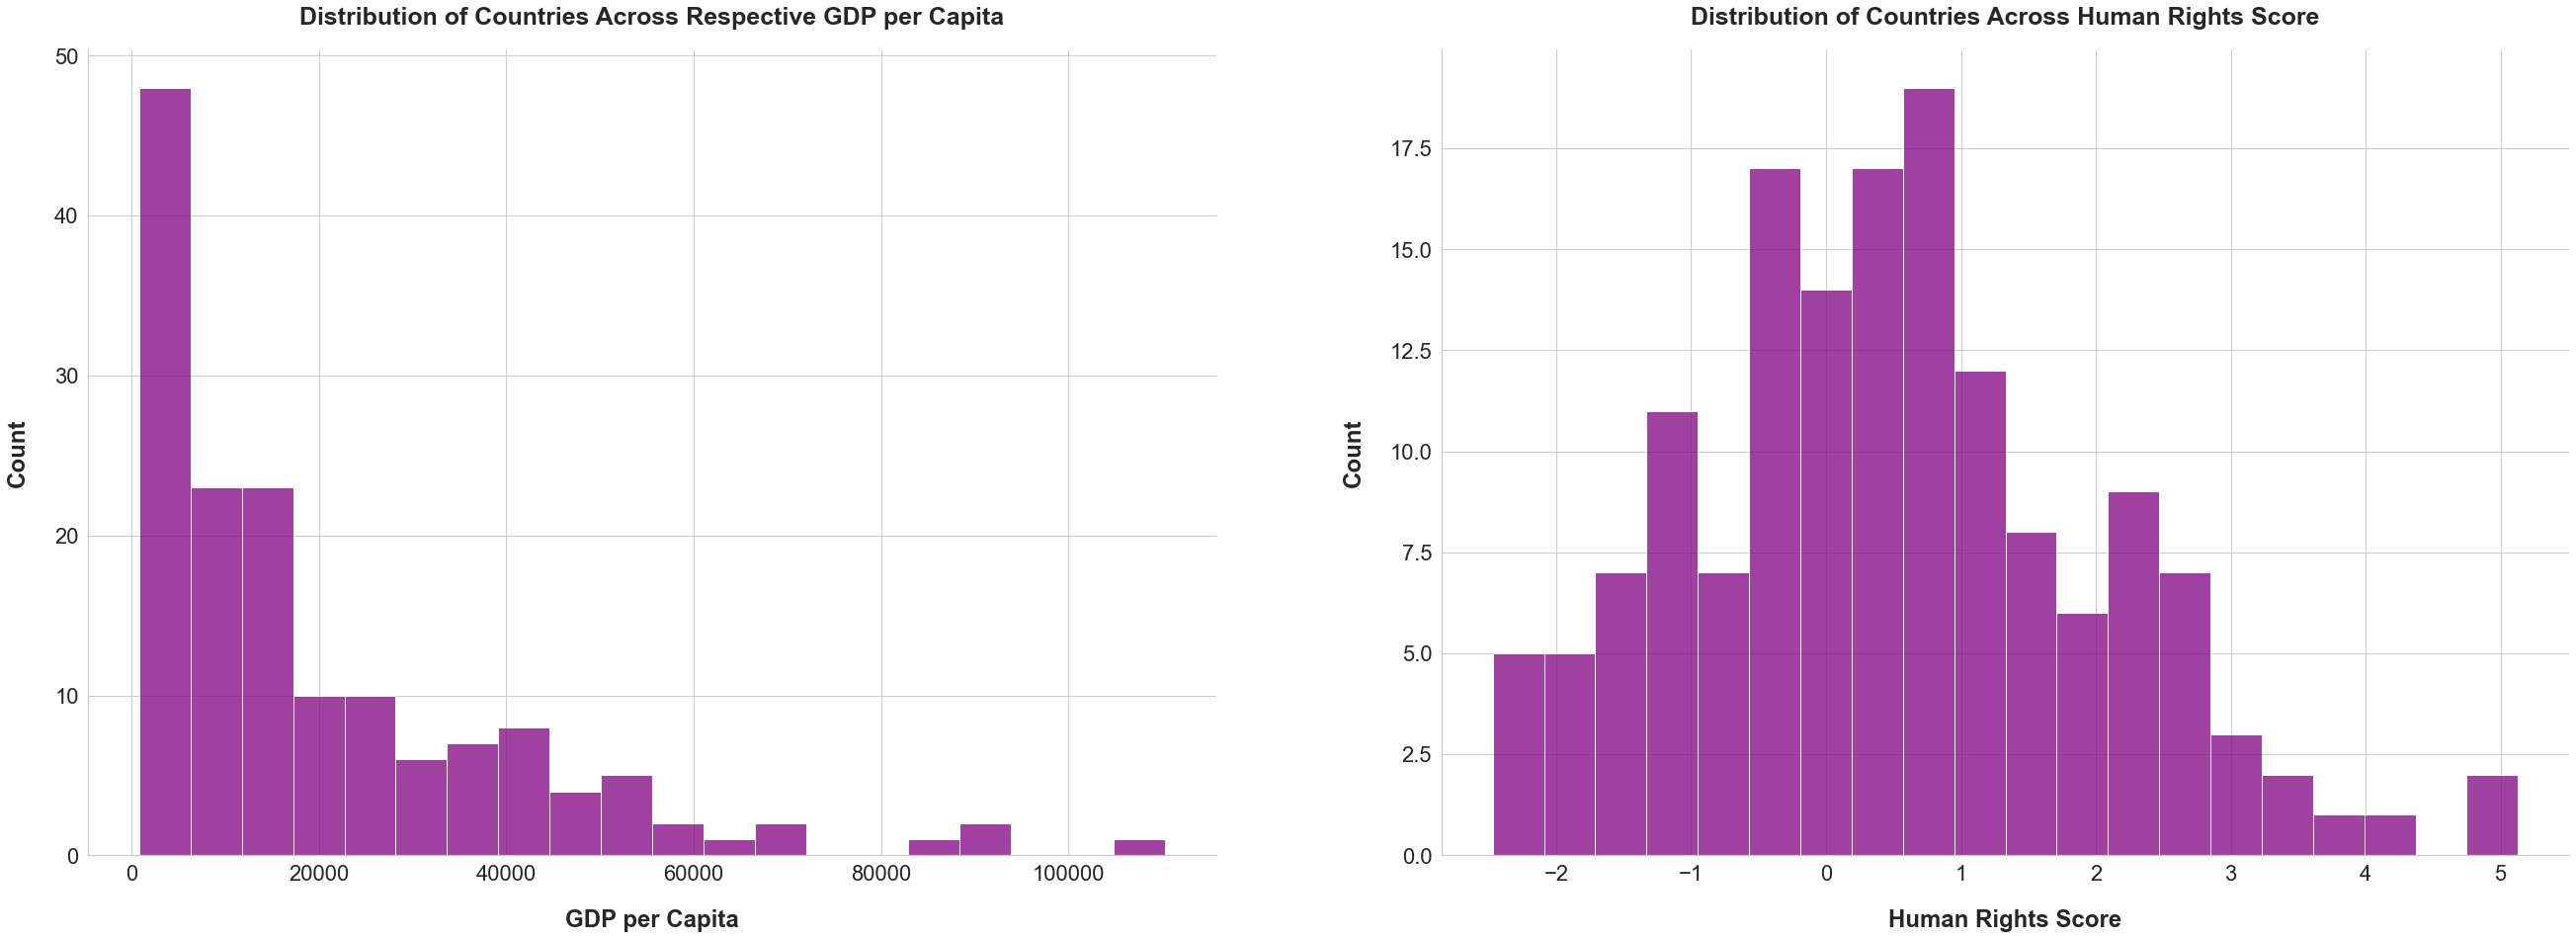

In [201]:

fig = plt.figure(figsize=(45,15))

ax_country_gdp = fig.add_subplot(121)

sns.histplot(data=prime_dataset,x='gdp_per_capita',bins=20,color='purple')

ax_country_gdp.set_title('Distribution of Countries Across Respective GDP per Capita',size=25,pad=25,fontdict={'fontweight':'bold'})
ax_country_gdp.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_country_gdp.set_xlabel('GDP per Capita',fontweight='bold',labelpad=25)        

for location in ['top', 'right']:
        ax_country_gdp.spines[location].set_visible(False)     
        
ax_country_humanrights = fig.add_subplot(122)

sns.histplot(data=prime_dataset,x='human_rights_score',bins=20, color='purple',)

ax_country_humanrights.set_title('Distribution of Countries Across Human Rights Score',size=25,pad=25,fontdict={'fontweight':'bold'})
ax_country_humanrights.set_ylabel('Count',labelpad=25,fontweight='bold')
ax_country_humanrights.set_xlabel('Human Rights Score',fontweight='bold',labelpad=25)      

for location in ['top', 'right']:
        ax_country_humanrights.spines[location].set_visible(False)               
        
plt.savefig('viz/histogram-gdp-humanrights.png',facecolor='white', transparent=False)

### *Correlation*

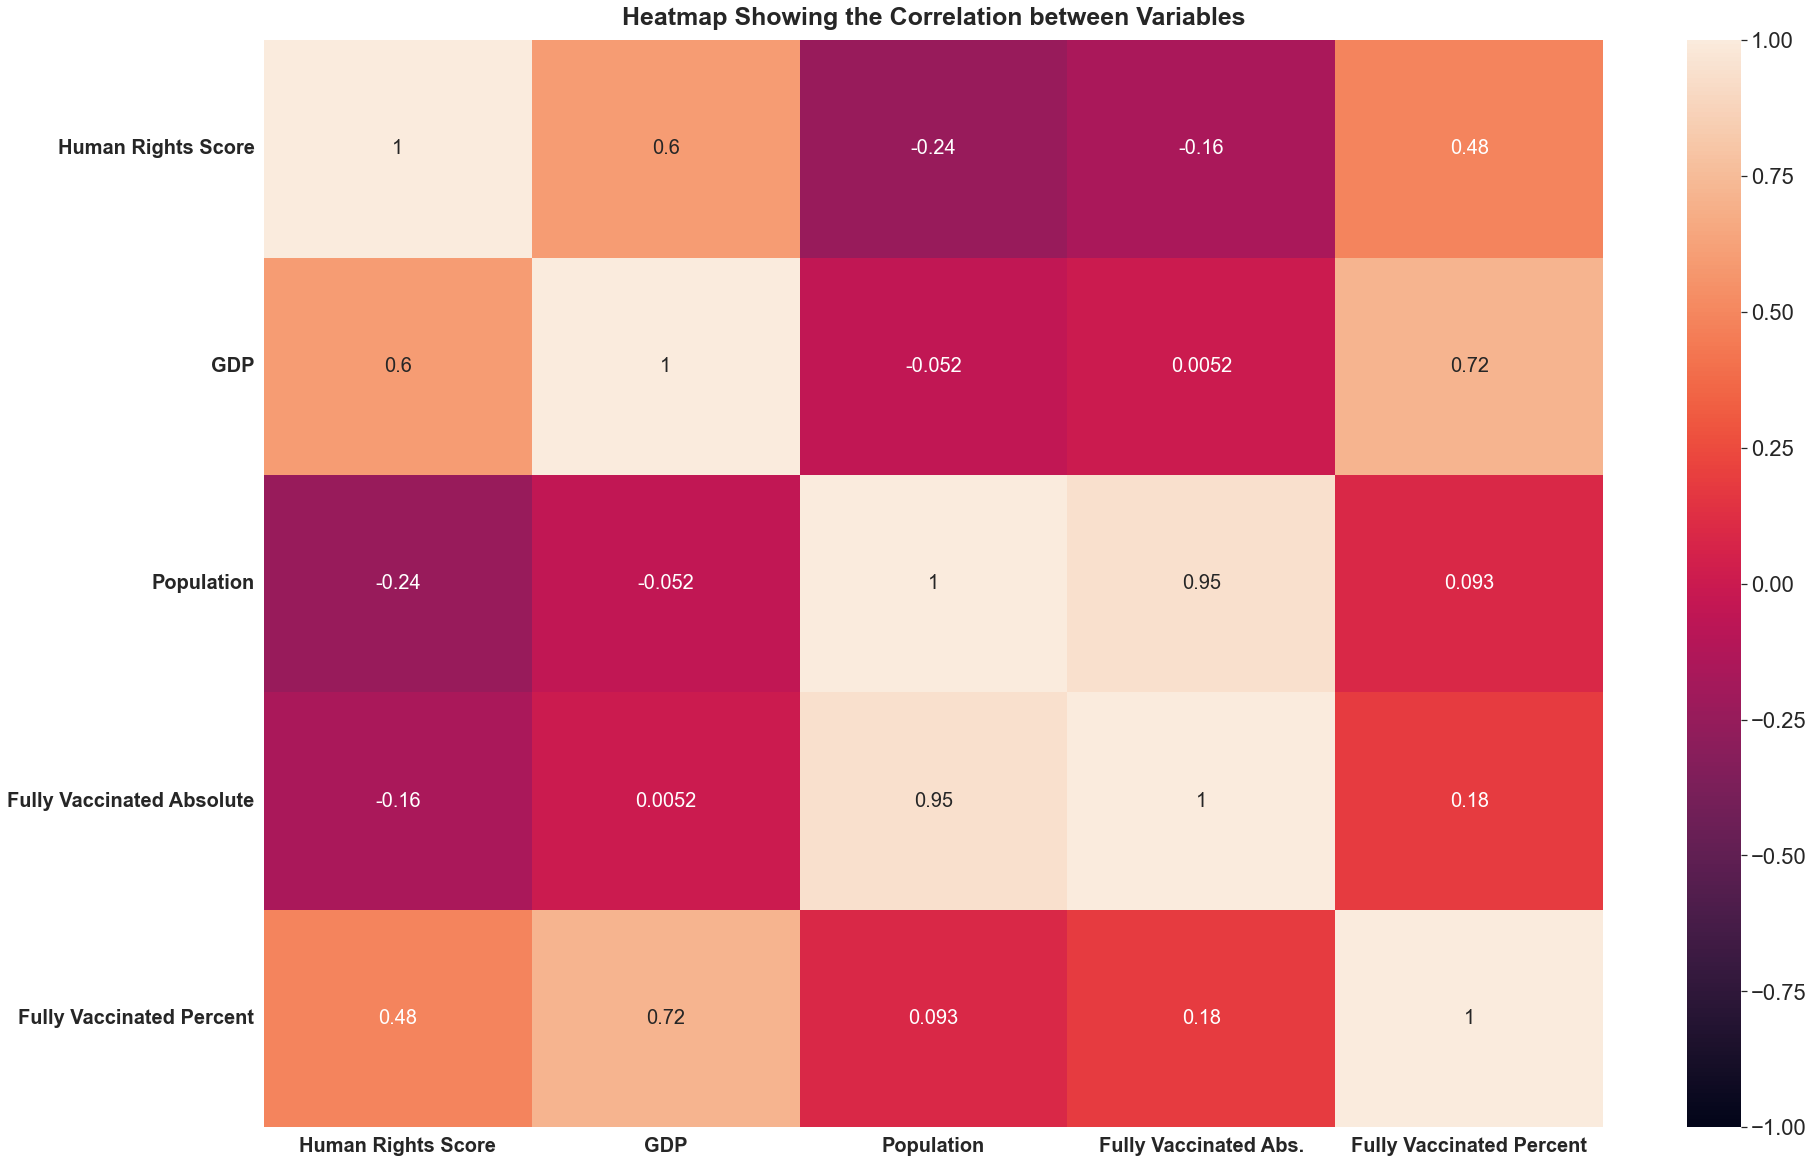

In [202]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

heatmap_correlation=sns.heatmap(prime_dataset.corr(),vmin=-1,vmax=1, annot=True,annot_kws={'size':20})

ax.set_title('Heatmap Showing the Correlation between Variables',size=25, pad=15, fontdict={'fontweight':'bold'})
ax.set_yticklabels(['Human Rights Score','GDP','Population','Fully Vaccinated Absolute','Fully Vaccinated Percent'], fontdict={'fontweight':'bold'},size=20,)
ax.set_xticklabels(['Human Rights Score','GDP','Population','Fully Vaccinated Abs.','Fully Vaccinated Percent'], fontdict={'fontweight':'bold'},size=20,rotation='horizontal')

plt.savefig('viz/correlation-heatmap.png',facecolor='white', transparent=False)

#### Analysis here
<strong> Strenght of Linear Relationship </strong>

Let's use the Dependent Variable : Fully Vaccinated Percent

| Absolute Value of Coefficient Correlation |  Strength  | Value |      Variable      |
| ----------------------------------------- |  --------  | ----- |      --------      | 
|                   0-0.2                   |  Very Weak |  0.093 |  Population  |   
|                                           |            |  0.18 | fully vaccinated abs |
|                                           |            |  0.16 | human_rights_score|
|                0.2-0.4                    |  Weak      | 0.39      |Political Regime |
|                     0.4-0.6               |  Moderate  | 0.48| Human Rights Score|
|0.6-0.8                                    | Strong|  0.72| GDP| 

<strong> Interpretation: </strong>
Human Rights Score has a moderate correlation and the GDP has a strong correlation to the Fully Vaccination Percentage


### *Scatterplots* 

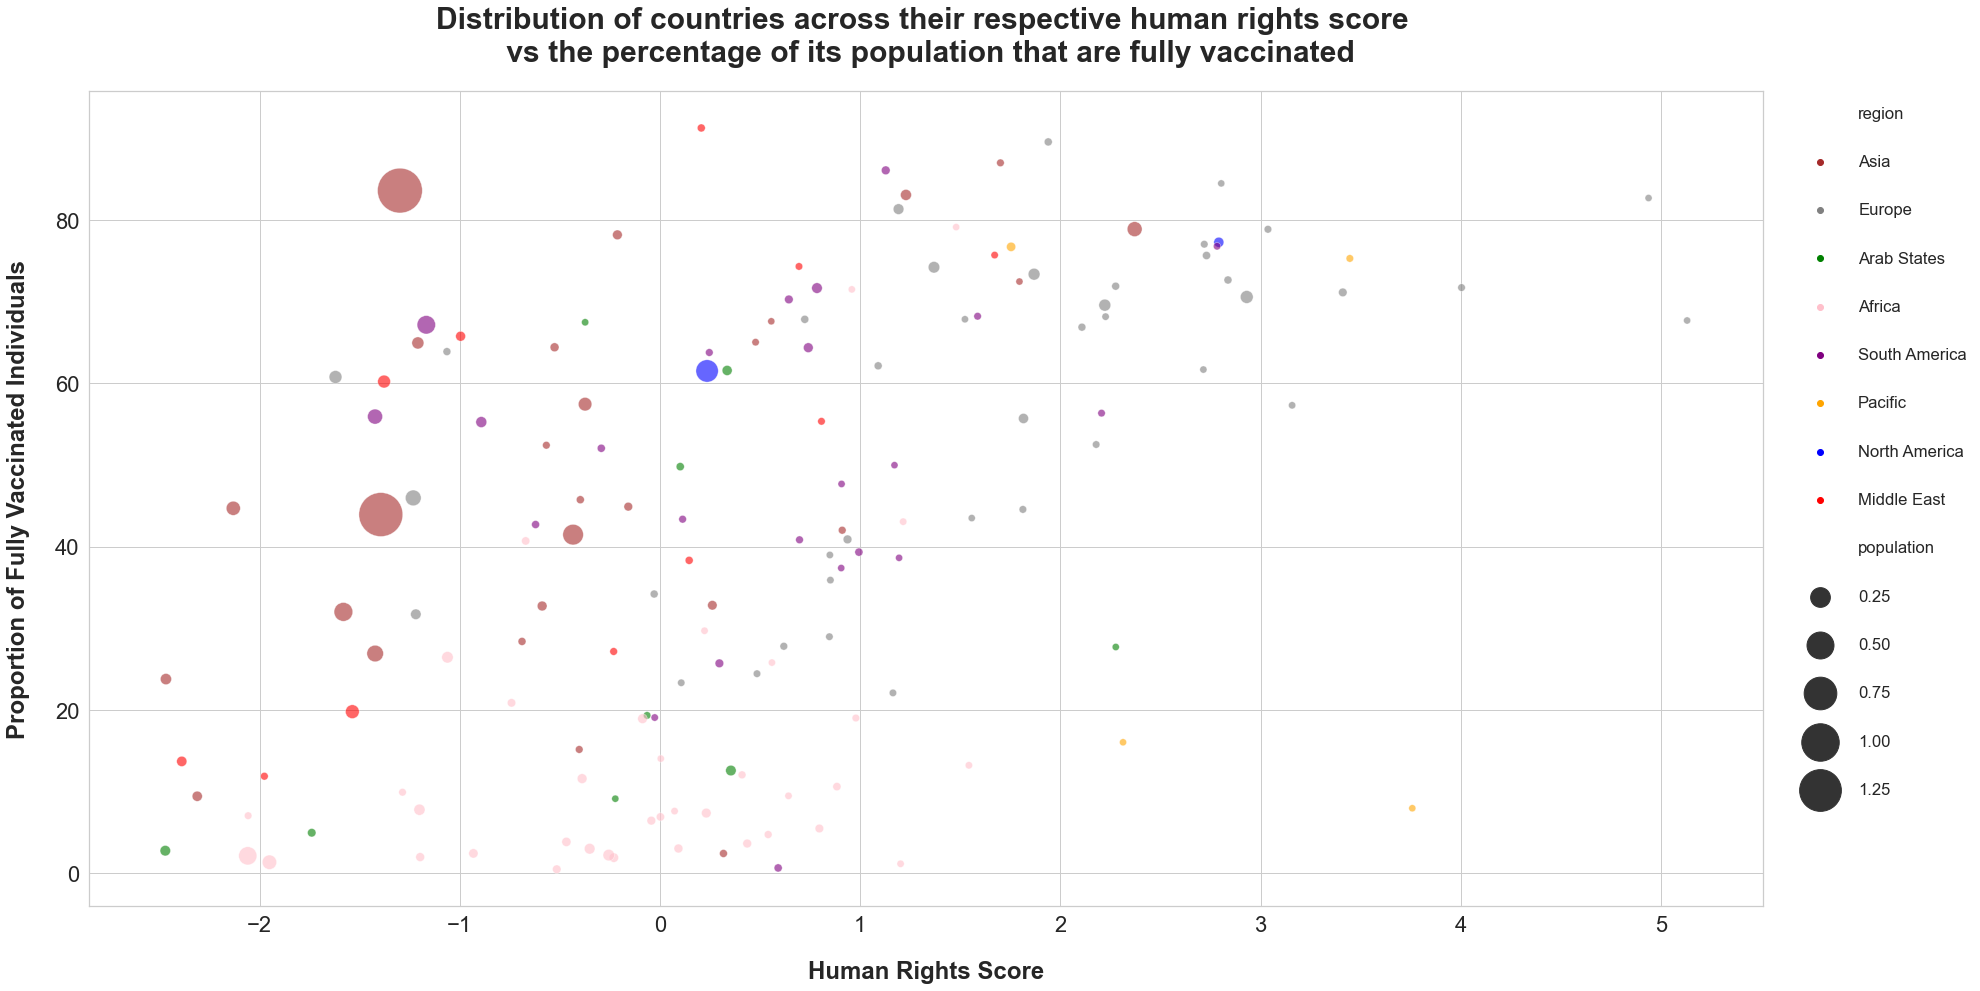

In [203]:
fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(111)
sns.scatterplot(data=prime_dataset,x='human_rights_score',y='fully_vaccinated_percent',hue='region',size='population',sizes=(50,2000),alpha=.6,palette={'North America':'blue','Pacific':'orange','Arab States':'green','Middle East':'red','South America':'purple','Asia':'brown','Africa':'pink','Europe':'grey'})

ax.set_title('Distribution of countries across their respective human rights score \n vs the percentage of its population that are fully vaccinated',fontdict={'fontweight':'bold'},size=30,pad=30)
ax.set_ylabel('Proportion of Fully Vaccinated Individuals',labelpad=25,fontweight='bold')
ax.set_xlabel('Human Rights Score',fontweight='bold',labelpad=25) 
ax.legend(loc='best',fontsize='x-small',bbox_to_anchor=(1.01,1),labelspacing=2, handlelength=3,frameon=False)

plt.savefig('viz/humanrights-fullyvax-scatterplot.png',facecolor='white', transparent=False)

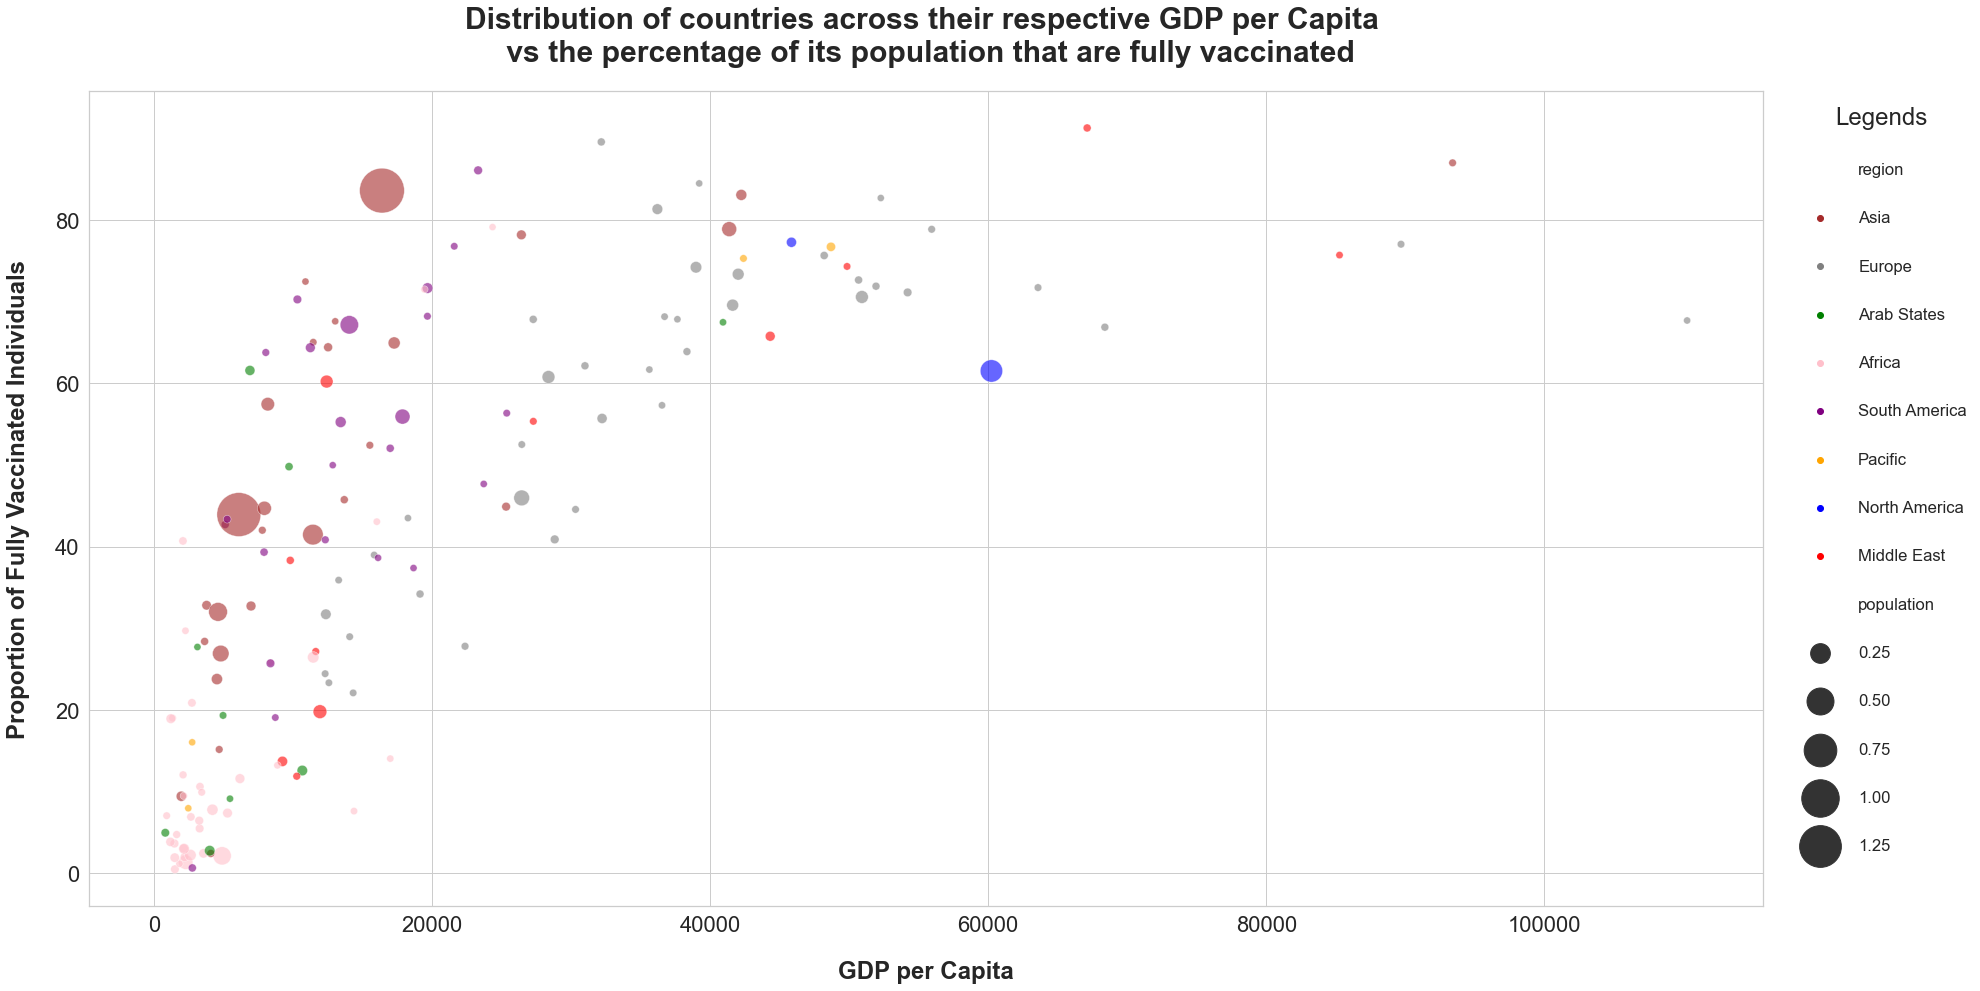

In [204]:
fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(111)
sns.scatterplot(data=prime_dataset,x='gdp_per_capita',y='fully_vaccinated_percent',hue='region',size='population',sizes=(50,2000),alpha=.6,palette={'North America':'blue','Pacific':'orange','Arab States':'green','Middle East':'red','South America':'purple','Asia':'brown','Africa':'pink','Europe':'grey'})

ax.set_title('Distribution of countries across their respective GDP per Capita \n vs the percentage of its population that are fully vaccinated',fontdict={'fontweight':'bold'},size=30,pad=30)
ax.set_ylabel('Proportion of Fully Vaccinated Individuals',labelpad=25,fontweight='bold')
ax.set_xlabel('GDP per Capita',fontweight='bold',labelpad=25) 
ax.legend(loc='best',fontsize='x-small',bbox_to_anchor=(1.01,1),title='Legends',labelspacing=2, handlelength=3,frameon=False)

plt.savefig('viz/gdp-fullyvax-scatterplot.png',facecolor='white', transparent=False)

### *Boxplots*

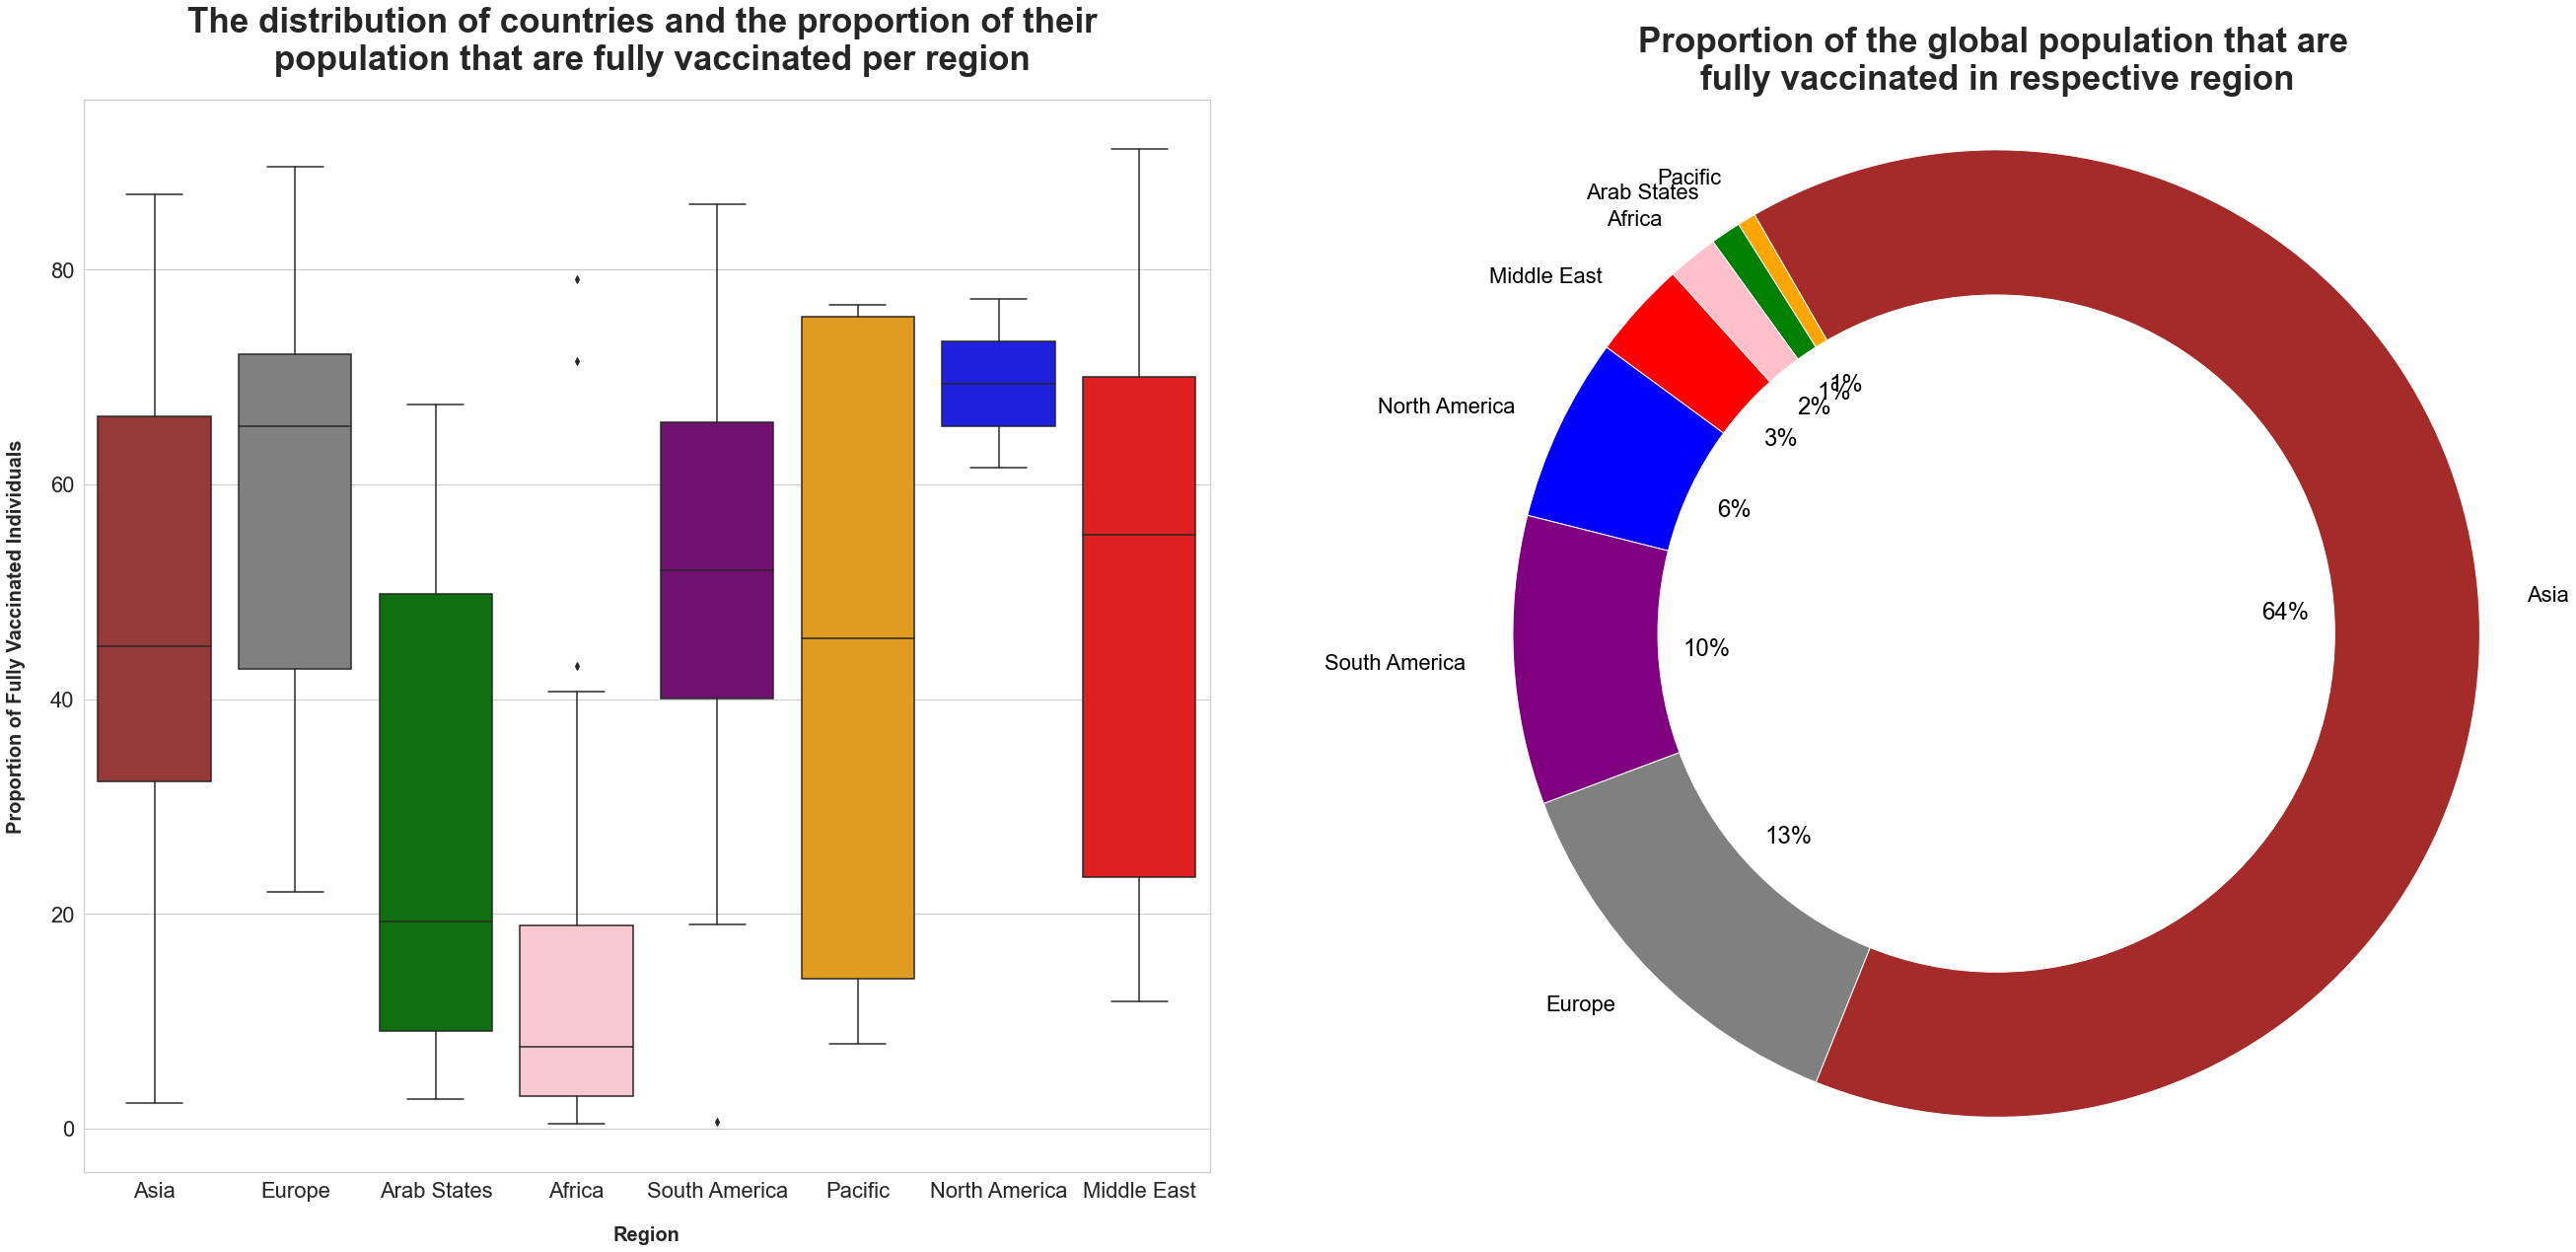

In [206]:
total_fullyvax_region = prime_dataset.groupby(by='region')['fully_vaccinated_absolute'].sum().sort_values()

fig=plt.figure(figsize=(45,20))

ax_boxplot_population = fig.add_subplot(121)

sns.boxplot(data=prime_dataset,x='region',y='fully_vaccinated_percent',palette={'North America':'blue','Pacific':'orange','Arab States':'green','Middle East':'red','South America':'purple','Asia':'brown','Africa':'pink','Europe':'grey'})


ax_boxplot_population.set_title('The distribution of countries and the proportion of their \n population that are fully vaccinated per region', fontsize=35,fontdict={'fontweight':'bold'},pad=30)
ax_boxplot_population.set_ylabel('Proportion of Fully Vaccinated Individuals',labelpad=25,fontweight='bold',fontsize=20)
ax_boxplot_population.set_xlabel('Region',fontweight='bold',labelpad=25,fontsize=20) 

ax_pie_population = fig.add_subplot(122)

ax_pie_population.pie(x=total_fullyvax_region,autopct='%1.0f%%',textprops=dict(color="black"),labels=total_fullyvax_region.index,colors=['orange','green','pink','red','blue','purple','grey','brown'],startangle=120)
ax_pie_population.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax_pie_population.set_title('Proportion of the global population that are \nfully vaccinated in respective region',fontsize=35,fontdict={'fontweight':'bold'},pad=10)

plt.savefig('viz/region-fullyvax-box-pie.png',facecolor='white', transparent=False)

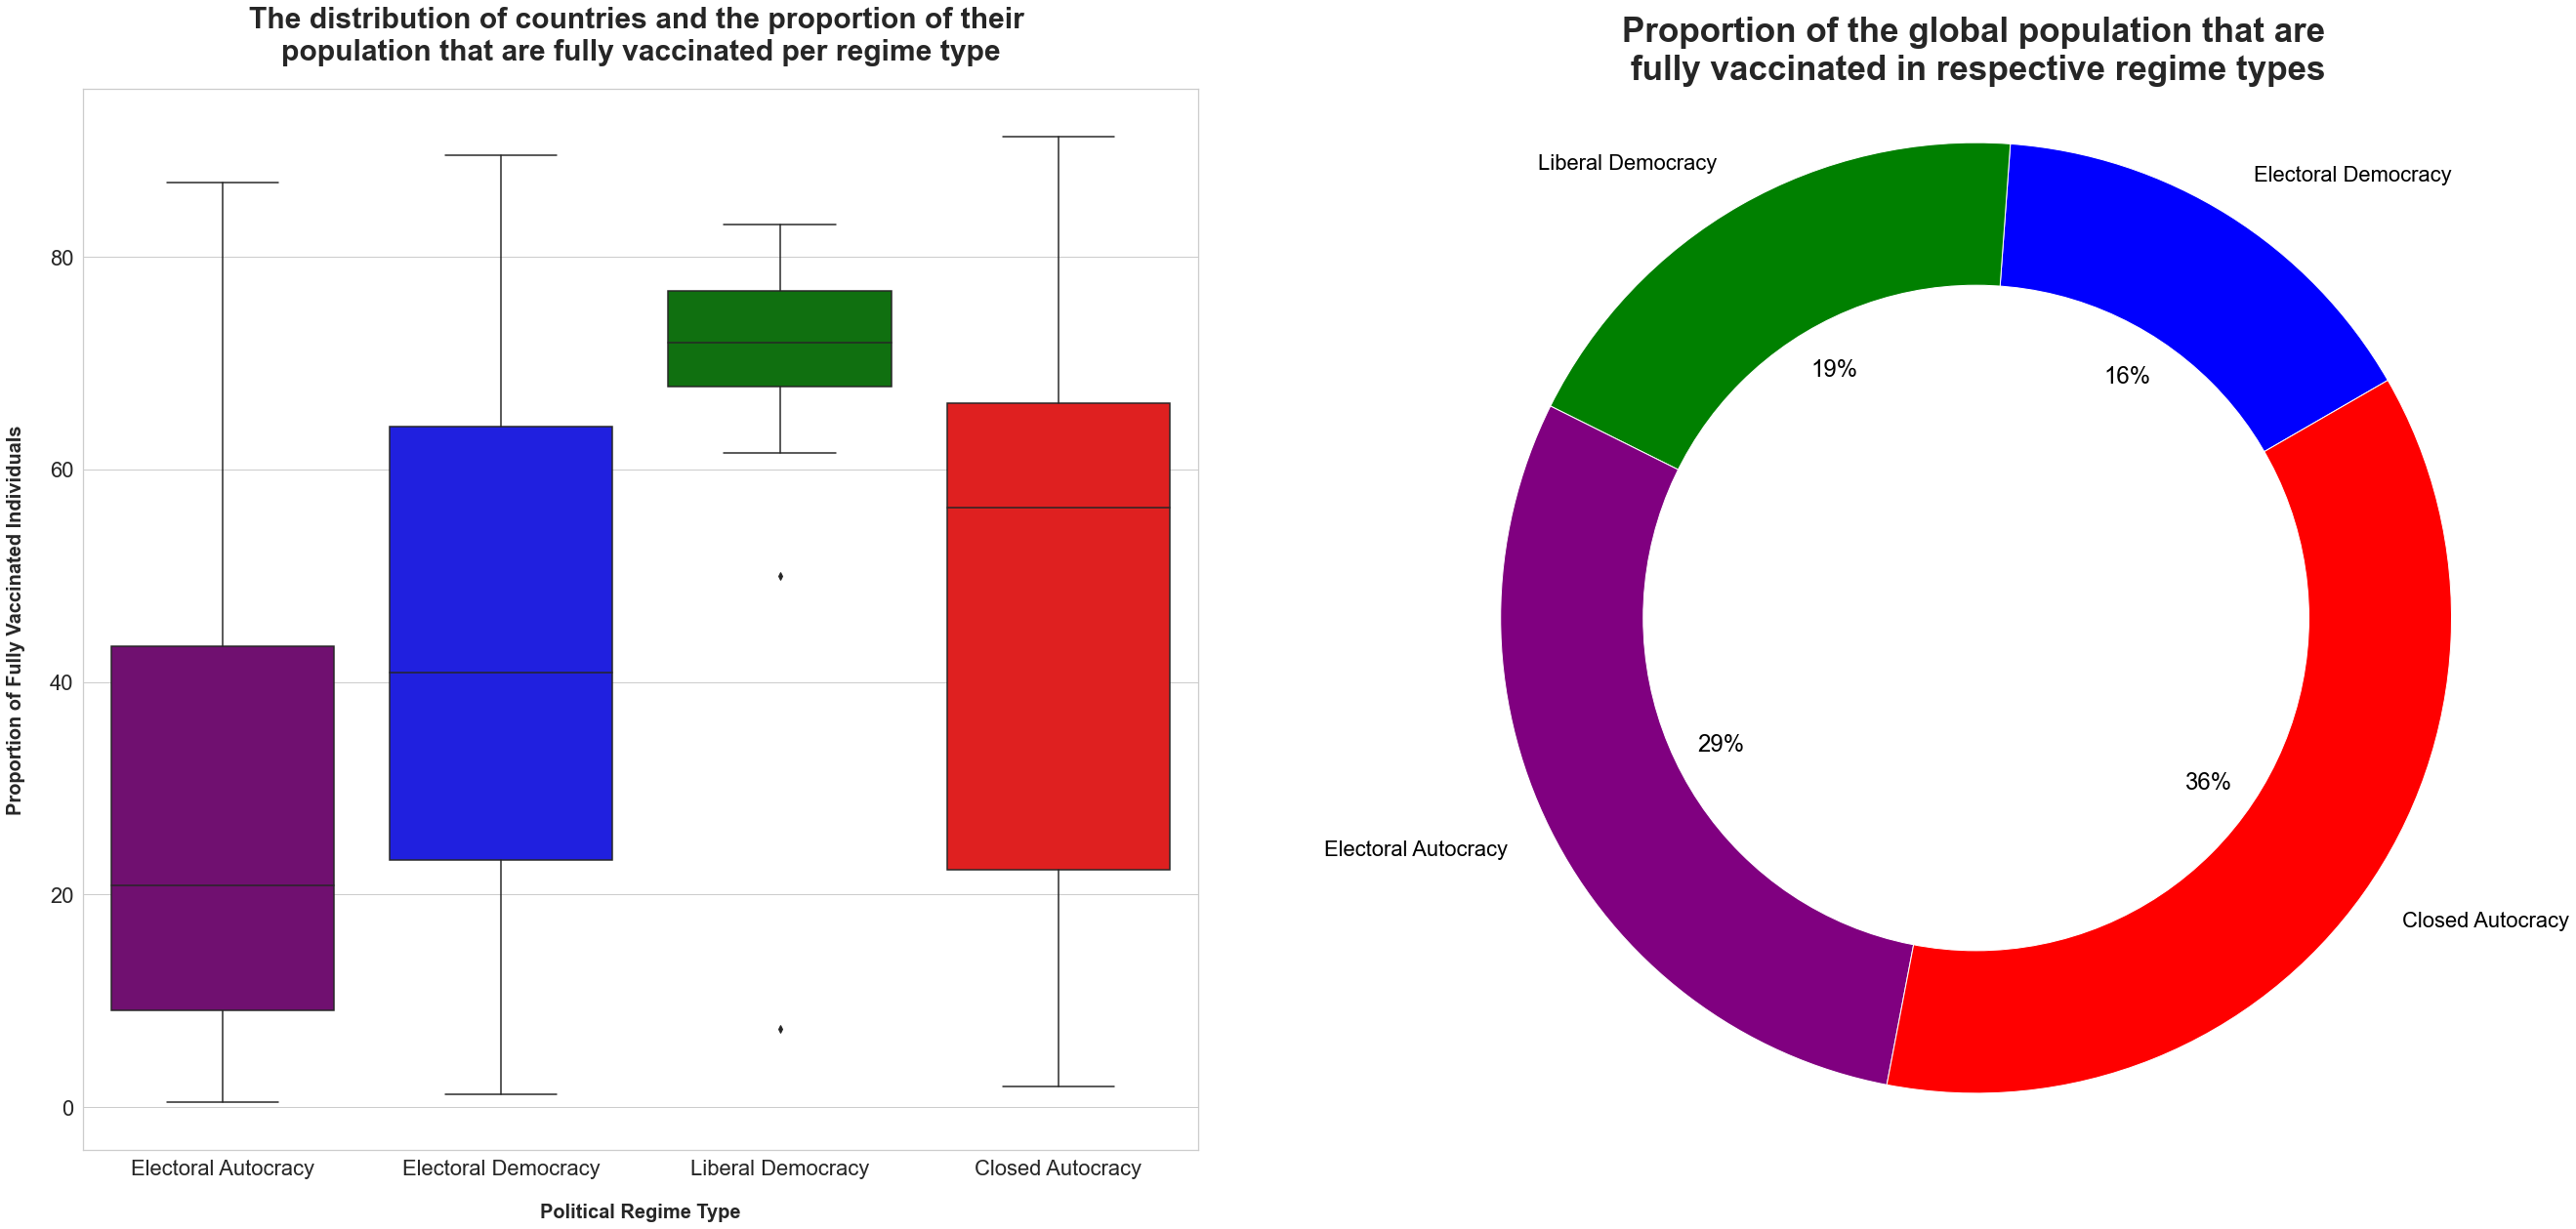

In [207]:
total_fullyvax_regime = prime_dataset.groupby(by='regime_type')['fully_vaccinated_absolute'].sum().sort_values()

fig=plt.figure(figsize=(45,20))

ax_boxplot_regime = fig.add_subplot(121)

sns.boxplot(data=prime_dataset,x='regime_type',y='fully_vaccinated_percent',palette={'Closed Autocracy':'red','Liberal Democracy':'green','Electoral Democracy':'blue','Electoral Autocracy':'purple'})

ax_boxplot_regime.set_title('The distribution of countries and the proportion of their \npopulation that are fully vaccinated per regime type', fontsize=30,fontdict={'fontweight':'bold'},pad=30)
ax_boxplot_regime.set_ylabel('Proportion of Fully Vaccinated Individuals',labelpad=25,fontweight='bold',fontsize=20)
ax_boxplot_regime.set_xlabel('Political Regime Type',fontweight='bold',labelpad=25,fontsize=20) 

ax_pie_regime = fig.add_subplot(122)

ax_pie_regime.pie(x=total_fullyvax_regime,autopct='%1.0f%%',textprops=dict(color="black"),labels=total_fullyvax_regime.index,colors=['blue','green','purple','red'],startangle=30)
ax_pie_regime.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax_pie_regime.set_title('Proportion of the global population that are \nfully vaccinated in respective regime types',fontsize=35,fontdict={'fontweight':'bold'},pad=10)

plt.savefig('viz/regime-fullyvax-box-pie.png',facecolor='white', transparent=False)

### *Bar charts* 

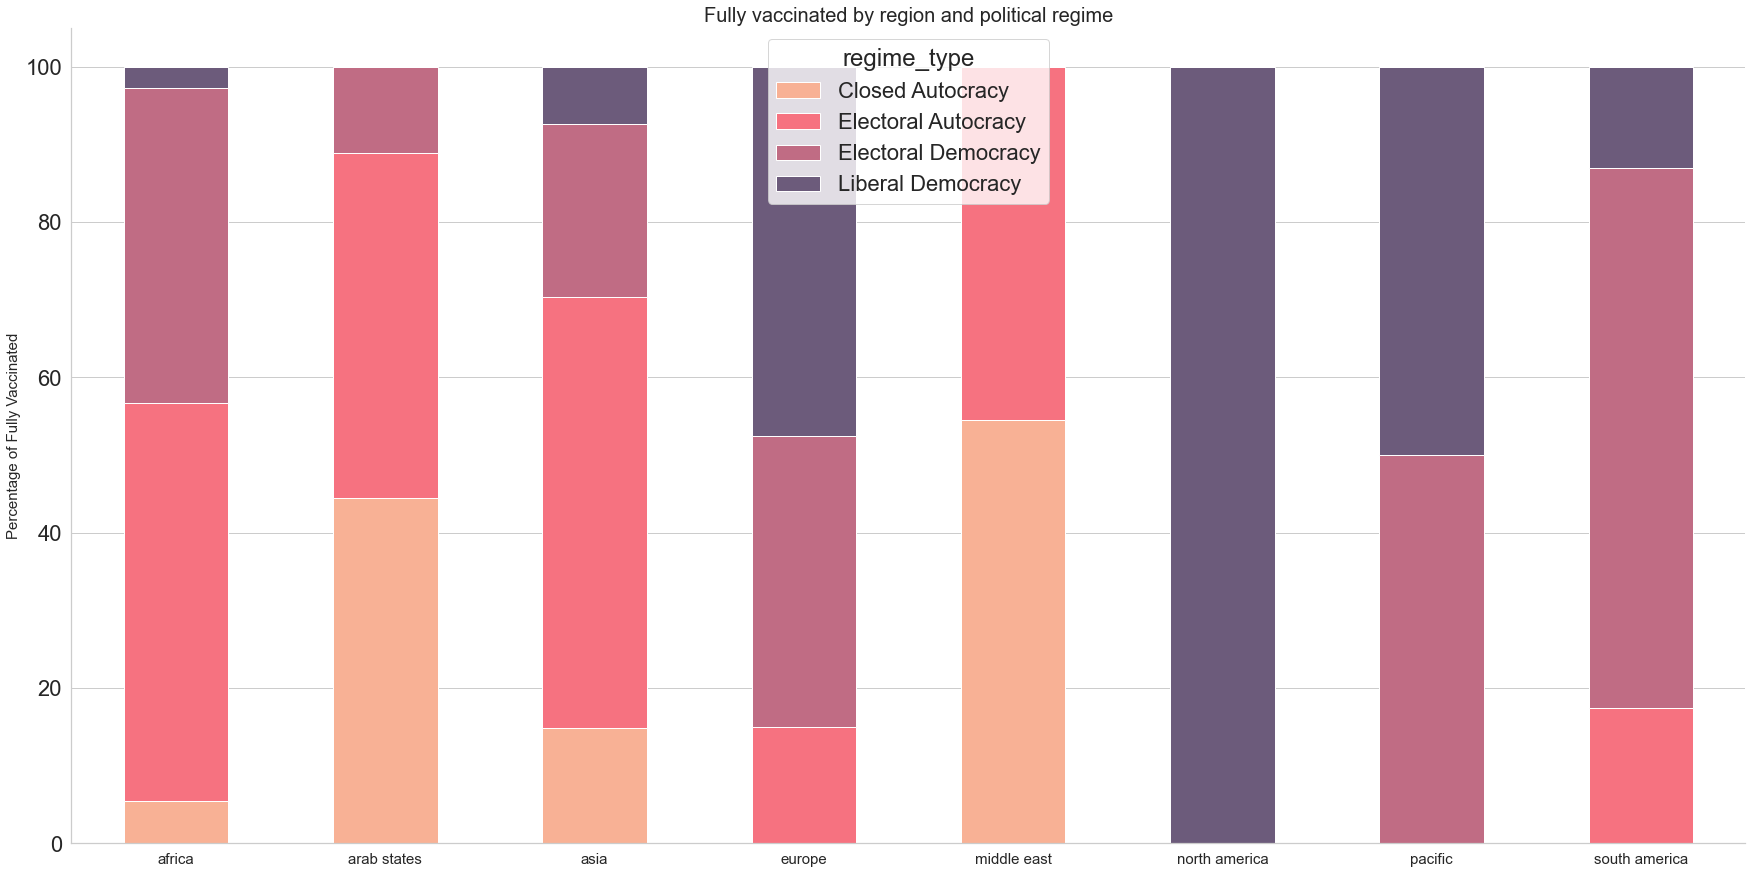

In [61]:
byclass=prime_dataset.groupby('region')['regime_type'].value_counts().unstack()

data = byclass.T / byclass.sum(axis=1) * 100


ax = data.T.plot(kind='bar', stacked=True, figsize=(30, 15), color=['#F8B195','#F67280','#C06C84','#6C5B7B'])

ax.set_title('Fully vaccinated by region and political regime', fontsize=20)
ax.set_xticklabels(["africa", "arab states", "asia","europe","middle east","north america","pacific","south america"], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Fully Vaccinated', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)